In [1]:
import os
import pandas as pd
import numpy as np
import nltk
import re

In [2]:
os.getcwd()

'/Users/abinpaul87/Downloads'

In [3]:
os.chdir('/Users/abinpaul87/Documents/IPBA CAPSTONE/ProjectFM/Text/')

In [4]:
filelist = ['201802 AJ.txt',
 '201402 PC Int.txt',
 '201102 PM.txt',
 '201002 PM.txt',
 '201203 PM.txt',
 '201302 PC.txt',
 '201502 AJ.txt',
 '201407 AJ.txt',
 '201902 PG Int.txt',
 '201602 AJ.txt',
 '201702 AJ.txt',
 '201907 NS.txt']

In [5]:
# Importing the speech text into the dataframe

data1 = []
for f in filelist:
    with open(f,'r',encoding='latin1') as myfile:
        lines = ' '.join(myfile.readlines())
        sent_text = nltk.sent_tokenize(lines)
        for sent in sent_text:
            if sent != "\n":
                data1.append([f,sent])
data2 = pd.DataFrame(columns=['file_name','Sentence'],data=data1) 



In [6]:
data2.head()

,file_name,Sentence
0,201802 AJ.txt,\n \n \n \n \n \n Budget 2018-2019 \n \n \...
1,201802 AJ.txt,I rise to present the Budget for 2018-19.
2,201802 AJ.txt,2.
3,201802 AJ.txt,"Madam, four years ago, we pledged to the peopl..."
4,201802 AJ.txt,We promised a \n leadership capable of taking ...


In [7]:
# No of sentences in the speeches
data2.groupby('file_name').count()

,Sentence
file_name,
201002 PM.txt,761
201102 PM.txt,847
201203 PM.txt,847
201302 PC.txt,882
201402 PC Int.txt,402
201407 AJ.txt,1036
201502 AJ.txt,914
201602 AJ.txt,1251
201702 AJ.txt,1031


In [8]:
# Tagging the Finance Minister name, Year, Type of Budget & Date details of the speeches

data2['FM'] = np.where(data2['file_name'].str.contains('PC'), 'P. Chidambaram',
                          np.where(data2['file_name'].str.contains('PM'), 'Pranab Mukherjee',
                          np.where(data2['file_name'].str.contains('AJ'), 'Arun Jaitley',
                          np.where(data2['file_name'].str.contains('PG'), 'Piyush Goyal',        
                          np.where(data2['file_name'].str.contains('NS'), 'Nirmala Sitharaman', ''))))) 

data2['year'] = data2['file_name'].str[:4]

data2['Budget']=np.where(data2['file_name'].str.contains('Int'),'Interim Budget','Budget')

In [9]:
data2['date'] = np.where(data2['file_name'].str.contains('201802 AJ.txt'), 'February 1, 2018',
                         np.where(data2['file_name'].str.contains('201402 PC Int.txt'), 'February 17, 2014',
                         np.where(data2['file_name'].str.contains('201102 PM.txt'), 'February 28, 2011',
                         np.where(data2['file_name'].str.contains('201002 PM.txt'), 'February  26,  2010',
                         np.where(data2['file_name'].str.contains('201203 PM.txt'), 'March 16, 2012',
                         np.where(data2['file_name'].str.contains('201302 PC.txt'), 'February 28, 2013',
                         np.where(data2['file_name'].str.contains('201502 AJ.txt'), 'February 28, 2015',
                         np.where(data2['file_name'].str.contains('201407 AJ.txt'), 'July 10, 2014',
                         np.where(data2['file_name'].str.contains('201902 PG Int.txt'), 'February 1, 2019',
                         np.where(data2['file_name'].str.contains('201602 AJ.txt'), 'February 29, 2016',
                         np.where(data2['file_name'].str.contains('201702 AJ.txt'), 'February 1, 2017',
                         np.where(data2['file_name'].str.contains('201907 NS.txt'), 'July 5, 2019',''))))))))))))



In [10]:
data2.head()

,file_name,Sentence,FM,year,Budget,date
0,201802 AJ.txt,\n \n \n \n \n \n Budget 2018-2019 \n \n \...,Arun Jaitley,2018,Budget,"February 1, 2018"
1,201802 AJ.txt,I rise to present the Budget for 2018-19.,Arun Jaitley,2018,Budget,"February 1, 2018"
2,201802 AJ.txt,2.,Arun Jaitley,2018,Budget,"February 1, 2018"
3,201802 AJ.txt,"Madam, four years ago, we pledged to the peopl...",Arun Jaitley,2018,Budget,"February 1, 2018"
4,201802 AJ.txt,We promised a \n leadership capable of taking ...,Arun Jaitley,2018,Budget,"February 1, 2018"


In [11]:
data2.shape

(10391, 6)

In [12]:
# Removing the new line charactes from the text
data2['Sent_clean'] = data2.Sentence.replace('\n','', regex=True)

In [13]:
data2.tail()

,file_name,Sentence,FM,year,Budget,date,Sent_clean
10386,201907 NS.txt,(l) \n Services \n by \n National \n Pension \...,Nirmala Sitharaman,2019,Budget,"July 5, 2019",(l) Services by National Pension System ...
10387,201907 NS.txt,(m) \n Rehabilitation/therapy/counselling \n s...,Nirmala Sitharaman,2019,Budget,"July 5, 2019",(m) Rehabilitation/therapy/counselling servi...
10388,201907 NS.txt,"(n) \n Admission \n to \n circus, \n dance, \n...",Nirmala Sitharaman,2019,Budget,"July 5, 2019","(n) Admission to circus, dance, theatre ..."
10389,201907 NS.txt,500 \n per \n person.,Nirmala Sitharaman,2019,Budget,"July 5, 2019",500 per person.
10390,201907 NS.txt,***,Nirmala Sitharaman,2019,Budget,"July 5, 2019",***


In [14]:
# Removing the abbreviations within parathesis
data2['Sent_clean']=data2['Sent_clean'].str.replace(r"\s*\([^()]*\)"," ") 

In [15]:
# Removing all special characters and numericals from the speech
data2['Sent_clean']=data2['Sent_clean'].str.replace('[^a-zA-Z ]', ' ',regex=True) 

In [16]:
data2.tail()

,file_name,Sentence,FM,year,Budget,date,Sent_clean
10386,201907 NS.txt,(l) \n Services \n by \n National \n Pension \...,Nirmala Sitharaman,2019,Budget,"July 5, 2019",Services by National Pension System T...
10387,201907 NS.txt,(m) \n Rehabilitation/therapy/counselling \n s...,Nirmala Sitharaman,2019,Budget,"July 5, 2019",Rehabilitation therapy counselling service...
10388,201907 NS.txt,"(n) \n Admission \n to \n circus, \n dance, \n...",Nirmala Sitharaman,2019,Budget,"July 5, 2019",Admission to circus dance theatre et...
10389,201907 NS.txt,500 \n per \n person.,Nirmala Sitharaman,2019,Budget,"July 5, 2019",per person
10390,201907 NS.txt,***,Nirmala Sitharaman,2019,Budget,"July 5, 2019",


In [17]:
data2['Sent_clean']= data2['Sent_clean'].str.strip()


In [18]:
# length of text as a column
data2['length_sent']=data2["Sent_clean"].str.len() 

In [20]:
data2.Sent_clean

0        Budget                Speech of   Arun Jaitley...
1                         I rise to present the Budget for
2                                                         
3        Madam  four years ago  we pledged to the peopl...
4        We promised a  leadership capable of taking di...
                               ...                        
10386    Services  by  National  Pension  System   Trus...
10387    Rehabilitation therapy counselling  services  ...
10388    Admission  to  circus   dance   theatre  etc  ...
10389                                          per  person
10390                                                     
Name: Sent_clean, Length: 10391, dtype: object

In [21]:
data2[data2['length_sent']==2]

,file_name,Sentence,FM,year,Budget,date,Sent_clean,length_sent
772,201802 AJ.txt,No.,Arun Jaitley,2018,Budget,"February 1, 2018",No,2
1239,201402 PC Int.txt,ii.,P. Chidambaram,2014,Interim Budget,"February 17, 2014",ii,2
1245,201402 PC Int.txt,iv.,P. Chidambaram,2014,Interim Budget,"February 17, 2014",iv,2
1250,201402 PC Int.txt,vi.,P. Chidambaram,2014,Interim Budget,"February 17, 2014",vi,2
1260,201402 PC Int.txt,ix.,P. Chidambaram,2014,Interim Budget,"February 17, 2014",ix,2
1413,201102 PM.txt,II.,Pranab Mukherjee,2011,Budget,"February 28, 2011",II,2
1952,201102 PM.txt,VI.,Pranab Mukherjee,2011,Budget,"February 28, 2011",VI,2
3231,201203 PM.txt,IV.,Pranab Mukherjee,2012,Budget,"March 16, 2012",IV,2
3426,201203 PM.txt,VI.,Pranab Mukherjee,2012,Budget,"March 16, 2012",VI,2
3861,201302 PC.txt,II.,P. Chidambaram,2013,Budget,"February 28, 2013",II,2


In [22]:
# Removing all texts having length <=2
data4=data2[data2['length_sent']>2]

In [23]:
data4.head()

,file_name,Sentence,FM,year,Budget,date,Sent_clean,length_sent
0,201802 AJ.txt,\n \n \n \n \n \n Budget 2018-2019 \n \n \...,Arun Jaitley,2018,Budget,"February 1, 2018",Budget Speech of Arun Jaitley...,162
1,201802 AJ.txt,I rise to present the Budget for 2018-19.,Arun Jaitley,2018,Budget,"February 1, 2018",I rise to present the Budget for,32
3,201802 AJ.txt,"Madam, four years ago, we pledged to the peopl...",Arun Jaitley,2018,Budget,"February 1, 2018",Madam four years ago we pledged to the peopl...,121
4,201802 AJ.txt,We promised a \n leadership capable of taking ...,Arun Jaitley,2018,Budget,"February 1, 2018",We promised a leadership capable of taking di...,115
5,201802 AJ.txt,"We promised to reduce poverty, \n expedite inf...",Arun Jaitley,2018,Budget,"February 1, 2018",We promised to reduce poverty expedite infra...,111


In [25]:
# CHecking for the introductory remarks of the various speeches
data4[data4['Sent_clean'].str.contains('I rise to')].head(12)

,file_name,Sentence,FM,year,Budget,date,Sent_clean,length_sent
1,201802 AJ.txt,I rise to present the Budget for 2018-19.,Arun Jaitley,2018,Budget,"February 1, 2018",I rise to present the Budget for,32
926,201402 PC Int.txt,Interim Budget 2014-2015 \n \n Speech of \n \n...,P. Chidambaram,2014,Interim Budget,"February 17, 2014",Interim Budget Speech of P Chid...,167
1328,201102 PM.txt,Budget 2011-2012 \n \n Speech of \n \n Pranab ...,Pranab Mukherjee,2011,Budget,"February 28, 2011",Budget Speech of Pranab Mukherje...,147
2175,201002 PM.txt,Budget 2010-2011\n \n \n \n Speech of\n \n ...,Pranab Mukherjee,2010,Budget,"February 26, 2010",Budget Speech of Pranab Mukhe...,166
2936,201203 PM.txt,Budget 2012-2013 \n \n Speech of \n \n Pranab ...,Pranab Mukherjee,2012,Budget,"March 16, 2012",Budget Speech of Pranab Mukherje...,144
3783,201302 PC.txt,Budget 2013-2014 \n \n Speech of \n \n P. Chid...,P. Chidambaram,2013,Budget,"February 28, 2013",Budget Speech of P Chidambaram ...,147
4666,201502 AJ.txt,Introduction 1 \n Major Challenges Ahead 5 \n ...,Arun Jaitley,2015,Budget,"February 28, 2015",Introduction Major Challenges Ahead Fisc...,605
5579,201407 AJ.txt,Budget 2014-2015 \n \n Speech of \n \n Arun Ja...,Arun Jaitley,2014,Budget,"July 10, 2014",Budget Speech of Arun Jaitley ...,142
6615,201902 PG Int.txt,\n \n \n \n \n \n \n \n Interim Budget 201...,Piyush Goyal,2019,Interim Budget,"February 1, 2019",Interim Budget Speech of Piyu...,165
7111,201602 AJ.txt,Governments \n 39 \n \n \n Annexes to Part \n ...,Arun Jaitley,2016,Budget,"February 29, 2016",Governments Annexes to Part B Dire...,271


In [26]:
data4.Sent_clean[data4['file_name']=='201907 NS.txt'][:3]

9391    Budget               Speech  of  Nirmala  Sith...
9392                                              PART  A
9393    The  recent  election  which  brought  us  to ...
Name: Sent_clean, dtype: object

In [27]:
# identifying and removing introductory remarks & index pages of the speeches
data4.loc[ [0,1,926,1328,2175,2936,4665,4666,3783,5579,6615,7109,7110,7111,8360,8361,8362,8363,8364,
                 8365,8366,8367,8368,8369,8370,8371,8372,9391,9392] , : ]

,file_name,Sentence,FM,year,Budget,date,Sent_clean,length_sent
0,201802 AJ.txt,\n \n \n \n \n \n Budget 2018-2019 \n \n \...,Arun Jaitley,2018,Budget,"February 1, 2018",Budget Speech of Arun Jaitley...,162
1,201802 AJ.txt,I rise to present the Budget for 2018-19.,Arun Jaitley,2018,Budget,"February 1, 2018",I rise to present the Budget for,32
926,201402 PC Int.txt,Interim Budget 2014-2015 \n \n Speech of \n \n...,P. Chidambaram,2014,Interim Budget,"February 17, 2014",Interim Budget Speech of P Chid...,167
1328,201102 PM.txt,Budget 2011-2012 \n \n Speech of \n \n Pranab ...,Pranab Mukherjee,2011,Budget,"February 28, 2011",Budget Speech of Pranab Mukherje...,147
2175,201002 PM.txt,Budget 2010-2011\n \n \n \n Speech of\n \n ...,Pranab Mukherjee,2010,Budget,"February 26, 2010",Budget Speech of Pranab Mukhe...,166
2936,201203 PM.txt,Budget 2012-2013 \n \n Speech of \n \n Pranab ...,Pranab Mukherjee,2012,Budget,"March 16, 2012",Budget Speech of Pranab Mukherje...,144
4665,201502 AJ.txt,CONTENTS \n \n PART -A \n \n Page No.,Arun Jaitley,2015,Budget,"February 28, 2015",CONTENTS PART A Page No,28
4666,201502 AJ.txt,Introduction 1 \n Major Challenges Ahead 5 \n ...,Arun Jaitley,2015,Budget,"February 28, 2015",Introduction Major Challenges Ahead Fisc...,605
3783,201302 PC.txt,Budget 2013-2014 \n \n Speech of \n \n P. Chid...,P. Chidambaram,2013,Budget,"February 28, 2013",Budget Speech of P Chidambaram ...,147
5579,201407 AJ.txt,Budget 2014-2015 \n \n Speech of \n \n Arun Ja...,Arun Jaitley,2014,Budget,"July 10, 2014",Budget Speech of Arun Jaitley ...,142


In [28]:
data4=data4.drop([0,1,926,1328,2175,2936,4665,4666,3783,5579,6615,7109,7110,7111,8360,8361,8362,8363,8364,
                 8365,8366,8367,8368,8369,8370,8371,8372,9391,9392],axis=0)

In [29]:
data4.head(10)

,file_name,Sentence,FM,year,Budget,date,Sent_clean,length_sent
3,201802 AJ.txt,"Madam, four years ago, we pledged to the peopl...",Arun Jaitley,2018,Budget,"February 1, 2018",Madam four years ago we pledged to the peopl...,121
4,201802 AJ.txt,We promised a \n leadership capable of taking ...,Arun Jaitley,2018,Budget,"February 1, 2018",We promised a leadership capable of taking di...,115
5,201802 AJ.txt,"We promised to reduce poverty, \n expedite inf...",Arun Jaitley,2018,Budget,"February 1, 2018",We promised to reduce poverty expedite infra...,111
6,201802 AJ.txt,"When our Government took over, India was consi...",Arun Jaitley,2018,Budget,"February 1, 2018",When our Government took over India was consi...,129
7,201802 AJ.txt,We have \n decisively reversed this.,Arun Jaitley,2018,Budget,"February 1, 2018",We have decisively reversed this,33
8,201802 AJ.txt,"The Government, led by Prime Minister, Shri \n...",Arun Jaitley,2018,Budget,"February 1, 2018",The Government led by Prime Minister Shri N...,132
9,201802 AJ.txt,"With the result, India stands out among the fa...",Arun Jaitley,2018,Budget,"February 1, 2018",With the result India stands out among the fa...,83
11,201802 AJ.txt,The journey of economic reforms during the pas...,Arun Jaitley,2018,Budget,"February 1, 2018",The journey of economic reforms during the pas...,93
12,201802 AJ.txt,As a result of the reforms undertaken by the \...,Arun Jaitley,2018,Budget,"February 1, 2018",As a result of the reforms undertaken by the ...,95
13,201802 AJ.txt,Measures taken by the \n Government have made ...,Arun Jaitley,2018,Budget,"February 1, 2018",Measures taken by the Government have made it...,82


In [31]:
#Increasing display column width to see entire text
pd.options.display.max_colwidth = 500

In [32]:
data4.head(5)

,file_name,Sentence,FM,year,Budget,date,Sent_clean,length_sent
3,201802 AJ.txt,"Madam, four years ago, we pledged to the people of India to give \n this nation an honest, clean and transparent Government.",Arun Jaitley,2018,Budget,"February 1, 2018",Madam four years ago we pledged to the people of India to give this nation an honest clean and transparent Government,121
4,201802 AJ.txt,We promised a \n leadership capable of taking difficult decisions and restoring strong \n performance of Indian economy.,Arun Jaitley,2018,Budget,"February 1, 2018",We promised a leadership capable of taking difficult decisions and restoring strong performance of Indian economy,115
5,201802 AJ.txt,"We promised to reduce poverty, \n expedite infrastructure creation and build a strong, confident and a New \n India.",Arun Jaitley,2018,Budget,"February 1, 2018",We promised to reduce poverty expedite infrastructure creation and build a strong confident and a New India,111
6,201802 AJ.txt,"When our Government took over, India was considered a part of \n fragile 5; a nation suffering from policy paralysis and corruption.",Arun Jaitley,2018,Budget,"February 1, 2018",When our Government took over India was considered a part of fragile a nation suffering from policy paralysis and corruption,129
7,201802 AJ.txt,We have \n decisively reversed this.,Arun Jaitley,2018,Budget,"February 1, 2018",We have decisively reversed this,33


In [33]:
# Reseting the index of the dataframe
data4 = data4.reset_index(drop=True)
data4.head()

,file_name,Sentence,FM,year,Budget,date,Sent_clean,length_sent
0,201802 AJ.txt,"Madam, four years ago, we pledged to the people of India to give \n this nation an honest, clean and transparent Government.",Arun Jaitley,2018,Budget,"February 1, 2018",Madam four years ago we pledged to the people of India to give this nation an honest clean and transparent Government,121
1,201802 AJ.txt,We promised a \n leadership capable of taking difficult decisions and restoring strong \n performance of Indian economy.,Arun Jaitley,2018,Budget,"February 1, 2018",We promised a leadership capable of taking difficult decisions and restoring strong performance of Indian economy,115
2,201802 AJ.txt,"We promised to reduce poverty, \n expedite infrastructure creation and build a strong, confident and a New \n India.",Arun Jaitley,2018,Budget,"February 1, 2018",We promised to reduce poverty expedite infrastructure creation and build a strong confident and a New India,111
3,201802 AJ.txt,"When our Government took over, India was considered a part of \n fragile 5; a nation suffering from policy paralysis and corruption.",Arun Jaitley,2018,Budget,"February 1, 2018",When our Government took over India was considered a part of fragile a nation suffering from policy paralysis and corruption,129
4,201802 AJ.txt,We have \n decisively reversed this.,Arun Jaitley,2018,Budget,"February 1, 2018",We have decisively reversed this,33


In [34]:
# Manual tagging of Sectros & Subsectors based on indexes

data4['Part']=''
data4['Segment']=''
data4['Sector']=''

In [35]:
# Segementing Budget 2010-11

data4.Part[1799:2210]='Part A'
data4.Part[2211:2424]='Part B'

data4.Segment[1799:1832]='Introduction'

data4.Segment[1833:1859]='Overview Of The Economy'
data4.Segment[1860:2033]='Consolidating  Growth'
data4.Segment[2034:2139]='Inclusive Development'
data4.Segment[2140:2210]='Strengthening Transparency  Public Accountabilty'
data4.Segment[2211:2424]='Tax Reforms'


data4.Sector[1833:1859]=''
data4.Sector[1860:1865]=''
data4.Sector[1866:1875]='Fiscal Consolidation'
data4.Sector[1876:1884]='Tax Reforms'
data4.Sector[1885:1894]='Peoples Ownership Of Psus'
data4.Sector[1895:1902]='Fertiliser Subsidy'
data4.Sector[1903:1909]='Petroleum And Diesel Pricing Policy'
data4.Sector[1910:1919]='Improving Investment Environment  Foreign Direct Investment'
data4.Sector[1920:1924]='Financial Stability And Development Council'
data4.Sector[1925:1939]='Banking Licences'
data4.Sector[1940:1943]='Corporate Governance'
data4.Sector[1944:1950]='Exports'
data4.Sector[1951:1980]='Agriculture Growth'
data4.Sector[1981:1998]='Infrastructure'
data4.Sector[1999:2014]='Energy'
data4.Sector[2015:2033]='Environment And Climate Change'
data4.Sector[2034:2041]=''
data4.Sector[2042:2047]='Education'
data4.Sector[2048:2051]='Health'
data4.Sector[2052:2057]='Financial Inclusion'
data4.Sector[2058:2060]='Financial Inclusion Fund And The Financial Inclusion Technology Fund'
data4.Sector[2061:2074]='Rural Development'
data4.Sector[2075:2086]='Urban Development And Housing'
data4.Sector[2087:2094]='Micro Small  Medium Enterprises'
data4.Sector[2095:2098]='Micro Finance'
data4.Sector[2099:2111]='Unorganised Sector  National Social Security Fund For Unorganised Sector Workers'
data4.Sector[2112:2120]='Skill Development'
data4.Sector[2121:2139]='Social Welfare'
data4.Sector[2140:2142]=''
data4.Sector[2143:2146]='Financial Sector Legislative Reforms Commission'
data4.Sector[2147:2149]='Administrative Reforms Commission'
data4.Sector[2150:2154]='Unique Identification Authority Of India'
data4.Sector[2155:2158]='Technology Advisory Group For Unique Projects'
data4.Sector[2159:2163]='Independent Evaluation Office'
data4.Sector[2164:2166]='Symbol For Indian Rupee'
data4.Sector[2167:2181]='Security And Justice'
data4.Sector[2182:2186]='National Mission For Delivery Of Justice And Legal Reforms'
data4.Sector[2187:2210]='Budget Estimates '
data4.Sector[2211:2235]=''
data4.Sector[2236:2278]='Direct Taxes '
data4.Sector[2279:2295]='Indirect Taxes'
data4.Sector[2296:2316]='Agriculture  Related Sectors'
data4.Sector[2317:2339]='Environment'
data4.Sector[2340:2349]='Infrastructure'
data4.Sector[2350:2359]='Medical Sector'
data4.Sector[2360:2369]='Infotainment'
data4.Sector[2370:2378]='Precious Metals'
data4.Sector[2379:2392]='Other Proposals'
data4.Sector[2393:2424]='Service Tax'


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [36]:
# Segementing Budget 2011-12

data4.Part[1082:1623]='Part A'
data4.Part[1624:1798]='Part B'

data4.Segment[1082:1124]='Introduction'
data4.Segment[1125:1151]='Overview Of The Economy'
data4.Segment[1152:1428]='Sustaining Growth'
data4.Segment[1429:1539]='Strengthening Inclusion'
data4.Segment[1540:1596]='Improving Governance'
data4.Segment[1597:1623]='Budget Estimates 2011-12 '
data4.Segment[1624:1797]='Tax Proposals'

data4.Sector[1157:1165]='Fiscal Consolidation'
data4.Sector[1166:1181]='Tax Reforms'
data4.Sector[1182:1187]='Expenditure Reforms'
data4.Sector[1188:1201]='Subsidies'
data4.Sector[1202:1208]='Peoples Ownership Of Psus'
data4.Sector[1209:1213]='Investment Environment   Foreign Direct Investment'
data4.Sector[1214:1221]='Foreign Institutional Investors'
data4.Sector[1222:1230]='Financial Sector Legislative Initiatives'
data4.Sector[1231:1233]='Public Sector Bank Recapitalisation'
data4.Sector[1234:1236]='Recapitalisation Of Regional Rural Banks'
data4.Sector[1237:1243]='Micro Finance Institutions'
data4.Sector[1244:1248]='Rural Infrastructure Development Fund'
data4.Sector[1249:1259]='Micro Small And Medium Enterprises'
data4.Sector[1260:1269]='Housing Sector Finance'
data4.Sector[1270:1275]='Financial Sector Legislative Reforms Commission'
data4.Sector[1276:1285]='Agriculture'
data4.Sector[1286:1289]='Bringing Green Revolution To Eastern Region'
data4.Sector[1290:1294]='Integrated Development Of Pulses Villages In Rainfed Areas'
data4.Sector[1295:1301]='Promotion Of Oil Palm'
data4.Sector[1302:1306]='Initiative On Vegetable Clusters'
data4.Sector[1307:1314]='Nutricereals'
data4.Sector[1315:1318]='National Mission For Protein Supplements'
data4.Sector[1319:1324]='Accelerated Fodder Development Programme'
data4.Sector[1325:1328]='National Mission For Sustainable Agriculture'
data4.Sector[1329:1341]='Agriculture Credit'
data4.Sector[1342:1347]='Mega Food Parks'
data4.Sector[1348:1360]='Storage Capacity And Cold Chains'
data4.Sector[1361:1364]='Agriculture Produce Marketing Act'
data4.Sector[1365:1380]='Infrastructure And Industry'
data4.Sector[1381:1396]='National Manufacturing Policy'
data4.Sector[1397:1411]='Exports'
data4.Sector[1412:1428]='Black Money'
data4.Sector[1437:1441]='Bharat Nirman'
data4.Sector[1442:1449]='Mgnrega'
data4.Sector[1450:1453]='Scheduled Castes And Tribal Subplan'
data4.Sector[1454:1458]='Education'
data4.Sector[1459:1466]='Sarva Shiksha Abhiyan'
data4.Sector[1467:1470]='National Knowledge Network'
data4.Sector[1471:1475]='Innovations'
data4.Sector[1476:1486]='Skill Development'
data4.Sector[1487:1491]='Health'
data4.Sector[1492:1496]='Financial Inclusion'
data4.Sector[1498:1505]='Unorganised Sector'
data4.Sector[1506:1509]='Forests'
data4.Sector[1510:1512]='Environmental Management'
data4.Sector[1513:1517]='Cleaning Of Rivers And Lakes'
data4.Sector[1518:1534]='Some Other Initiatives'
data4.Sector[1535:1539]='Census'
data4.Sector[1541:1544]='Uid Mission'
data4.Sector[1545:1580]='It Initiatives'
data4.Sector[1581:1589]='Corruption'
data4.Sector[1590:1596]='Tagup'
data4.Sector[1626:1649]='Direct Taxes '
data4.Sector[1650:1681]='Indirect Taxes'
data4.Sector[1682:1692]='Agriculture  Related Sectors'
data4.Sector[1693:1705]='Manufacturing Sector'
data4.Sector[1706:1728]='Environment'
data4.Sector[1729:1735]='Infrastructure'
data4.Sector[1736:1753]='Other Proposals'
data4.Sector[1754:1797]='Service Tax'

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [37]:
# Segementing Budget 2012-13

data4.Part[2426:2886]='Part A'
data4.Part[2887:3126]='Part B'

data4.Segment[2426:2461]='Introduction'
data4.Segment[2462:2485]='Overview Of The Economy'
data4.Segment[2486:2493]='Growth '
data4.Segment[2494:2556]='Growth - Fiscal Consolidation'
data4.Segment[2557:2607]='Growth - Strengthening Investment Environment'
data4.Segment[2608:2678]='Infrastructure And Industrial Development'
data4.Segment[2679:2727]='Agriculture'
data4.Segment[2728:2843]='Inclusion'
data4.Segment[2844:2860]='Governance'
data4.Segment[2861:2886]='Budget Estimates'
data4.Segment[2887:3126]='Tax Reforms'


data4.Sector[2426:2461]=''
data4.Sector[2462:2485]=''
data4.Sector[2486:2493]=''
data4.Sector[2494:2498]='Frbm Act'
data4.Sector[2499:2512]='Expenditure Reforms'
data4.Sector[2513:2536]='Subsidies'
data4.Sector[2537:2548]='Tax Reforms'
data4.Sector[2549:2556]='Disinvestment Policy'
data4.Sector[2557:2559]=''
data4.Sector[2560:2564]='Foreign Direct Investment'
data4.Sector[2565:2567]='Advance Pricing Agreement'
data4.Sector[2568:2573]='Financial Sector'
data4.Sector[2574:2580]='Capital Markets'
data4.Sector[2581:2585]='Legislative Reforms'
data4.Sector[2586:2591]='Capitalisation Of Banks And Financial Holding Company'
data4.Sector[2592:2594]='Priority Sector Lending'
data4.Sector[2595:2601]='Financial Inclusion'
data4.Sector[2602:2607]='Regional Rural Banks'
data4.Sector[2608:2626]=''
data4.Sector[2627:2630]='National Manufacturing Policy'
data4.Sector[2631:2635]='Power And Coal'
data4.Sector[2636:2648]='Transport Roads And Civil Aviation'
data4.Sector[2649:2653]='Delhi Mumbai Industrial Corridor'
data4.Sector[2654:2655]='Housing Sector'
data4.Sector[2656:2661]='Fertilisers'
data4.Sector[2662:2670]='Textiles'
data4.Sector[2671:2675]='Micro Small And Medium Enterprises'
data4.Sector[2676:2678]='Public Procurement Policy For Micro And Small Enterprises'
data4.Sector[2679:2692]=''
data4.Sector[2693:2697]='National Mission For Protein Supplement'
data4.Sector[2698:2709]='Agriculture Credit'
data4.Sector[2710:2713]='Agricultural Research'
data4.Sector[2714:2721]='Irrigation'
data4.Sector[2722:2727]='National Mission On Food Processing'
data4.Sector[2728:2728]=''
data4.Sector[2729:2732]='Scheduled Castes And Tribal Sub Plans'
data4.Sector[2733:2748]='Food Security'
data4.Sector[2749:2773]='Rural Development And Panchayati Raj'
data4.Sector[2774:2785]='Health'
data4.Sector[2786:2809]='Employment And Skill Development'
data4.Sector[2810:2822]='Skill Development'
data4.Sector[2823:2833]='Social Security And The Needs Of Weaker Sections'
data4.Sector[2834:2843]='Security'
data4.Sector[2844:2844]=''
data4.Sector[2845:2848]='UID Aadhaar'
data4.Sector[2849:2854]='Black Money'
data4.Sector[2855:2860]='Public Procurement Legislation'
data4.Sector[2861:2886]=''
data4.Sector[2887:2896]=''
data4.Sector[2897:2938]='Direct Taxes'
data4.Sector[2939:2941]='Indirect Taxes'
data4.Sector[2942:3003]='Service Tax'
data4.Sector[3004:3008]='Service Tax - Agriculture  Related Sectors'
data4.Sector[3009:3012]='Service Tax - Infrastructure'
data4.Sector[3013:3016]='Service Tax - Mining'
data4.Sector[3017:3020]='Service Tax - Railways'
data4.Sector[3021:3024]='Service Tax - Roads'
data4.Sector[3025:3028]='Service Tax - Civil Aviation'
data4.Sector[3029:3054]='Service Tax -  Manufacturing'
data4.Sector[3055:3064]='Service Tax - Health And Nutrition'
data4.Sector[3065:3093]='Service Tax - Environment'
data4.Sector[3094:3109]='Service Tax - Rationalisation Measures'
data4.Sector[3110:3126]='Service Tax - Baggage Allowance'

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: SettingWithCopyWarning: 
A value i

In [38]:
# Segementing Budget 2013-14

data4.Part[3128:3650]='Part A'
data4.Part[3652:3854]='Part B'

data4.Segment[3131:3192]='The Economy And The Challenges'
data4.Segment[3193:3285]='The Plan And Budgetary Allocations'
data4.Segment[3286:3334]='Agriculture'
data4.Segment[3335:3468]='Investment Infrastructure And Industry'
data4.Segment[3469:3538]='Financial Sector'
data4.Segment[3539:3550]='Environment'
data4.Segment[3551:3651]='Other Proposals'
data4.Segment[3652:3856]='Tax Proposals'

data4.Sector[3131:3158]=''
data4.Sector[3159:3192]='Fiscal Deficit Current Account Deficit and Inflation'
data4.Sector[3193:3209]=''
data4.Sector[3210:3223]='SC ST Women and Children'
data4.Sector[3224:3232]='Minorities'
data4.Sector[3233:3235]='Disabled Persons'
data4.Sector[3236:3259]='Health and Education'
data4.Sector[3260:3266]='ICDS'
data4.Sector[3267:3271]='Drinking Water'
data4.Sector[3272:3279]='Rural Development'
data4.Sector[3280:3285]='JNNURM'
data4.Sector[3286:3294]=''
data4.Sector[3295:3301]='Agricultural Credit'
data4.Sector[3302:3319]='Green Revolution'
data4.Sector[3320:3325]='Farmer Producer Organizations'
data4.Sector[3326:3329]='National Livestock Mission'
data4.Sector[3330:3334]='Food Security'
data4.Sector[3335:3359]=''
data4.Sector[3360:3364]='Road Construction'
data4.Sector[3365:3370]='Cabinet Committee Investment'
data4.Sector[3371:3378]='New Investment'
data4.Sector[3379:3392]='Savings'
data4.Sector[3393:3400]='Industrial Corridors'
data4.Sector[3401:3403]='LehKargil Transmission Line'
data4.Sector[3404:3407]='Ports'
data4.Sector[3408:3414]='National Waterways'
data4.Sector[3415:3420]='Oil and Gas'
data4.Sector[3421:3428]='Coal'
data4.Sector[3429:3431]='Power'
data4.Sector[3432:3447]='Micro Small and Medium Enterprises'
data4.Sector[3448:3466]='Textiles'
data4.Sector[3467:3468]='Foreign Trade'
data4.Sector[3469:3474]=''
data4.Sector[3475:3494]='Banking'
data4.Sector[3495:3514]='Insurance'
data4.Sector[3515:3538]='Capital Market'
data4.Sector[3539:3550]=''
data4.Sector[3551:3557]='Backward Regions Grant Fund'
data4.Sector[3558:3564]='Skill Development'
data4.Sector[3565:3568]='Defence'
data4.Sector[3569:3576]='Science  Technology'
data4.Sector[3577:3582]='Institutions of Excellence'
data4.Sector[3583:3585]='Sports of all kind deserve our support'
data4.Sector[3586:3588]='Broadcasting'
data4.Sector[3589:3592]='Panchayati Raj'
data4.Sector[3593:3596]='Post Offices'
data4.Sector[3597:3598]='Ghadar Memorial'
data4.Sector[3599:3640]='Central Schemes'
data4.Sector[3641:3650]='Budget Estimates'
data4.Sector[3651:3651]=''
data4.Sector[3652:3661]=''
data4.Sector[3662:3752]='Direct Taxes'
data4.Sector[3753:3832]='Indirect Taxes'
data4.Sector[3833:3841]='Goods and Services Tax'
data4.Sector[3842:3856]='Conclusion'

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [39]:
# Segementing Budget 2014-15 (Int)

data4.Segment[729:743]='The Current Economic Situation'
data4.Segment[744:745]='Challenges And Goals'
data4.Segment[746:828]='State Of The Economy'
data4.Segment[829:900]='Report Card Of 2013-14'
data4.Segment[901:944]='Overview Of The Interim Budget'
data4.Segment[945:993]='Financial Sector'
data4.Segment[994:1024]='A Vision For The Future'
data4.Segment[1025:1066]='Revenues'
data4.Segment[1067:1073]='Budget Estimates'
data4.Segment[1074:1083]='Conclusion'


data4.Sector[729:743]=''
data4.Sector[744:745]=''
data4.Sector[746:758]='The Twin Deficits And Inflation'
data4.Sector[759:767]='Agriculture'
data4.Sector[768:774]='Investment'
data4.Sector[775:780]='Foreign Trade'
data4.Sector[781:790]='Manufacturing'
data4.Sector[791:795]='Infrastructure'
data4.Sector[796:800]='Exchange Rate'
data4.Sector[801:811]='GDP Growth  Decline And Rise'
data4.Sector[812:828]='UPAs Record Of Growth'
data4.Sector[829:831]=''
data4.Sector[832:838]='Pathbreaking Decisions'
data4.Sector[839:844]='Historic Legislations'
data4.Sector[845:861]='Economic Initiatives'
data4.Sector[862:869]='Social Sector Initiatives'
data4.Sector[870:872]='Additional Central Assistance To Some States'
data4.Sector[873:876]='Space'
data4.Sector[877:900]='Redeeming Our Promises'
data4.Sector[901:911]='Plan And Nonplan Expenditure'
data4.Sector[912:915]='Railways'
data4.Sector[916:927]='SC Subplan And Tribal Subplan  Gender Budget And Child Budget'
data4.Sector[928:929]='Defence'
data4.Sector[930:941]='One Rank One Pension'
data4.Sector[942:944]='Central Armed Police Forces'
data4.Sector[945:959]='Banking'
data4.Sector[960:962]='Credit To Minority Communities'
data4.Sector[963:965]='Self Help Groups'
data4.Sector[966:978]='Education Loans'
data4.Sector[979:981]='Insurance'
data4.Sector[982:984]='Financial Markets'
data4.Sector[985:988]='Commodity Derivatives Market'
data4.Sector[989:990]='Key Pending Bills'
data4.Sector[991:993]='Public Debt Management Agency'
data4.Sector[994:1024]=''
data4.Sector[1025:1032]='GST And DTC'
data4.Sector[1033:1039]='Funding Scientific Research'
data4.Sector[1040:1045]='Offshore Accounts'
data4.Sector[1046:1066]='Changes In Tax Rates'



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value i

In [40]:
# Segementing Budget 2014-15

data4.Part[4632:5319]='Part A'
data4.Part[5321:5508]='Part B'

data4.Segment[4632:4805]='State Of The Economy'
data4.Segment[4806:4945]='Plan  & Budegtary Allocations'
data4.Segment[4946:5005]='Agriculture'
data4.Segment[5006:5049]='Industry'
data4.Segment[5050:5108]='Infrastructure'
data4.Segment[5109:5166]='Financial Sector'
data4.Segment[5167:5201]='Defence & Internal Security'
data4.Segment[5202:5298]='Culture  Tourism'
data4.Segment[5299:5320]='Budget Estimates'
data4.Segment[5321:5508]='Tax Proposals'


data4.Sector[4691:4697]='Expenditure Management Commission'
data4.Sector[4698:4705]='GST'
data4.Sector[4706:4714]='Tax Administration'
data4.Sector[4715:4729]='Advance Ruling and Other Tax Related Measures'
data4.Sector[4730:4747]='FDI'
data4.Sector[4748:4755]='Bank Capitalization'
data4.Sector[4756:4758]='PSU Capital Expenditure'
data4.Sector[4759:4764]='Smart Cities'
data4.Sector[4765:4770]='eVisa'
data4.Sector[4771:4776]='REITs  InvITs'
data4.Sector[4777:4779]='Kissan Vikas Patra'
data4.Sector[4780:4784]='Skill India'
data4.Sector[4785:4789]='Pradhan Mantri Krishi Sinchayee Yojana'
data4.Sector[4790:4793]='Swatchh Bharat Abhiyan'
data4.Sector[4794:4797]='Shyama Prasad Mukherji Rurban Mission'
data4.Sector[4798:4801]='Deendayal Upadhyaya Gram Jyoti Yojana'
data4.Sector[4802:4805]='Statue of Unity'
data4.Sector[4806:4813]=''
data4.Sector[4814:4826]='Welfare of Senior Citizens   Varishtha Pension Bima Yojana'
data4.Sector[4827:4830]='Empowerment of the Differently Abled Persons'
data4.Sector[4831:4834]='Incentives for the Visually Challenged'
data4.Sector[4835:4841]='Women  Child Development'
data4.Sector[4842:4845]='Beti Bachao Beti Padhao Yojana'
data4.Sector[4846:4848]='Gender Mainstreaming'
data4.Sector[4849:4852]='Rural Development   Pradhan Mantri Gram Sadak Yojana'
data4.Sector[4853:4855]='MGNREGA'
data4.Sector[4856:4861]='National Livelihood Mission'
data4.Sector[4862:4864]='Rural Housing'
data4.Sector[4865:4866]='Watershed Development'
data4.Sector[4867:4869]='Panchayati Raj'
data4.Sector[4870:4885]='Safe Drinking Water'
data4.Sector[4886:4894]='Education   School Education'
data4.Sector[4895:4901]='Higher Education'
data4.Sector[4902:4909]='Digital India'
data4.Sector[4910:4914]='Information and Broadcasting'
data4.Sector[4915:4919]='Urban Development   Urban Renewal'
data4.Sector[4920:4924]='Pooled Municipal Debt Obligation Facility'
data4.Sector[4925:4929]='Urban Transportation'
data4.Sector[4930:4938]='Housing for All'
data4.Sector[4939:4941]='Malnutrition'
data4.Sector[4942:4945]='Minorities'
data4.Sector[4946:4972]=''
data4.Sector[4973:4975]='Agriculture Credit'
data4.Sector[4976:4979]='Interest Subvention Scheme for Short Term Crop Loans'
data4.Sector[4980:4982]='Rural Infrastructure Development Fund'
data4.Sector[4983:4985]='Warehouse Infrastructure Fund'
data4.Sector[4986:4989]='Creation of Long Term Rural Credit Fund'
data4.Sector[4990:4992]='Allocation of STCRC Fund'
data4.Sector[4993:4995]='Producers Development and Upliftment Corpus'
data4.Sector[4996:5001]='Food Security'
data4.Sector[5002:5005]='Kisan TV'
data4.Sector[5006:5017]=''
data4.Sector[5018:5020]='Special Economic Zones'
data4.Sector[5021:5024]='Apprenticeship'
data4.Sector[5025:5041]='Micro Small and Medium Enterprises sector'
data4.Sector[5042:5049]='Textiles'
data4.Sector[5050:5054]=''
data4.Sector[5055:5060]='Shipping'
data4.Sector[5061:5064]='Inland Navigation'
data4.Sector[5065:5067]='New Airports'
data4.Sector[5068:5078]='Roads sector'
data4.Sector[5079:5080]='Power'
data4.Sector[5081:5083]='Coal'
data4.Sector[5084:5091]='New  Renewable Energy'
data4.Sector[5092:5099]='Petroleum  Natural Gas'
data4.Sector[5100:5103]='Mining'
data4.Sector[5104:5108]='Revision of Royalty Rate'
data4.Sector[5109:5135]='Capital Market'
data4.Sector[5136:5151]='Banking'
data4.Sector[5152:5158]='Insurance Sector'
data4.Sector[5159:5166]='Small Savings'
data4.Sector[5167:5169]=''
data4.Sector[5170:5173]='One Rank One Pension'
data4.Sector[5174:5178]='Modernization'
data4.Sector[5179:5185]='War Memorial'
data4.Sector[5186:5189]='The Defence Production'
data4.Sector[5190:5196]='Internal Security'
data4.Sector[5197:5201]='National Police Memorial'
data4.Sector[5202:5218]=''
data4.Sector[5219:5225]='Water Resources and cleaning of Ganga   Linking of Rivers'
data4.Sector[5226:5229]='Sacred Rivers'
data4.Sector[5230:5232]='Development of Ghats and beautification of Riverfront'
data4.Sector[5233:5235]='NRI Ganga Fund'
data4.Sector[5236:5238]='Science and Technology   Technology Research Centres'
data4.Sector[5239:5245]='Stimulating Investment In Biotechnology'
data4.Sector[5246:5249]='Indian Space Programme'
data4.Sector[5250:5260]='Sports and Youth Affairs   Sports'
data4.Sector[5261:5266]='Youth'
data4.Sector[5267:5269]='Displaced Kashmiri Migrants'
data4.Sector[5270:5272]='Conservation of Himalayas'
data4.Sector[5273:5274]='Academy for Customs'
data4.Sector[5275:5278]='North Eastern States   Organic Food'
data4.Sector[5279:5282]='North East Railway Connectivity'
data4.Sector[5283:5285]='24x7 Channel for the North East'
data4.Sector[5286:5288]='Andhra Pradesh and Telangana'
data4.Sector[5289:5294]='National Capital Territory of Delhi'
data4.Sector[5295:5298]='Andaman and Nicobar Island and Puducherry'
data4.Sector[5299:5319]=''
data4.Sector[5320:5320]=''
data4.Sector[5321:5329]=''
data4.Sector[5330:5401]='Direct Taxes'
data4.Sector[5402:5442]='Indirect Taxes'
data4.Sector[5443:5467]='Excise duties'
data4.Sector[5468:5508]='Service Tax'

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [41]:
# Segementing Budget 2015-16

data4.Part[3855:4232]='Part A'
data4.Part[4410:4411]='Part A'

data4.Part[4233:4396]='Part B'
data4.Part[4412:4630]='Part B'

data4.Segment[3855:3942]='Introduction'
data4.Segment[3943:3962]='Major Challenges Ahead'
data4.Segment[3963:3978]='Fiscal Roadmap'
data4.Segment[3979:3989]='Good Governance'
data4.Segment[3990:4007]='Agriculture'
data4.Segment[4008:4028]='Funding The Unfunded'
data4.Segment[4029:4052]='From Jan Dhan To Jan Suraksha'
data4.Segment[4053:4094]='Infrastructure'
data4.Segment[4095:4117]='Financial Markets'
data4.Segment[4118:4130]='Monetising Gold'
data4.Segment[4131:4137]='Investment'
data4.Segment[4138:4140]='Safe India'
data4.Segment[4141:4145]='Tourism'
data4.Segment[4146:4160]='Green India'
data4.Segment[4161:4188]='Skill India'
data4.Segment[4189:4221]='Digital India'
data4.Segment[4222:4232]='Budget Estimates'
data4.Segment[4233:4396]='Tax Proposals'
data4.Segment[4397:4409]='Conclusion'
data4.Segment[4410:4411]='Annexure-A'
data4.Segment[4412:4630]='Annexure-B'

data4.Sector[4412:4482]='Direct Taxes'
data4.Sector[4483:4559]='Indirect taxes'
data4.Sector[4560:4563]='Customs Excise'
data4.Sector[4564:4630]='Service tax'

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [42]:
# Segementing Budget 2016-17

data4.Part[5930:6368]='Part A'
data4.Part[6371:6554]='Part A'

data4.Part[6555:6586]='Part B'
data4.Part[6587:6950]='Part B'

data4.Segment[5930:5985]='Introduction'
data4.Segment[5986:6053]='Agriculture And Farmers Welfare'
data4.Segment[6054:6096]='Rural Sector'
data4.Segment[6097:6142]='Social Sector Including Health Care'
data4.Segment[6143:6144]='Education Skills And Job Creation'
data4.Segment[6145:6157]='Education'
data4.Segment[6158:6167]='Skill Development'
data4.Segment[6168:6188]='Job Creation'
data4.Segment[6189:6256]='V Infrastructure And Investment'
data4.Segment[6257:6299]='Financial Sector Reforms'
data4.Segment[6300:6334]='Governance And Ease Of Doing Business'
data4.Segment[6335:6368]='Fiscal Discipline'
data4.Segment[6371:6545]='Tax Reforms'
data4.Segment[6546:6554]='Conclusion'
data4.Segment[6555:6586]='Annexure-A'
data4.Segment[6587:6950]='Annexure-B'


data4.Sector[6386:6394]='Relief to small tax payers'
data4.Sector[6395:6426]='Measures to boost growth and employment generation'
data4.Sector[6427:6430]='Incentivising domestic value addition to help Make in India'
data4.Sector[6431:6439]='Measures for moving towards a pensioned society'
data4.Sector[6440:6451]='Measures for promoting affordable housing'
data4.Sector[6452:6473]='Additional resource mobilization for agriculture rural economy and  clean environment '
data4.Sector[6474:6518]='Reducing litigation and providing certainty in taxation'
data4.Sector[6519:6532]='Simplification and rationalization of taxation'
data4.Sector[6533:6545]='Use of Technology for creating accountability'
data4.Sector[6555:6569]='Proposed Changes/Reforms In Fdi And  Related Policies'
data4.Sector[6570:6576]='Measures For Deepening Of Corporate Bond Market '
data4.Sector[6577:6578]='Allocations Of Important Ministries, Sectors And Vulnerable Sections'
data4.Sector[6579:6584]='Allocations Of Important Schemes '
data4.Sector[6585:6586]='Resources Transferred To State And Utgovernments '
data4.Sector[6587:6680]='Direct Taxes'
data4.Sector[6681:6950]='Indirect Taxes'

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [43]:
# Segementing Budget 2017-18

data4.Part[6952:7434]='Part A'
data4.Part[7435:7605]='Part B'

data4.Part[7612:7633]='Part A'
data4.Part[7634:7794]='Part B'

data4.Segment[6952:7048]='Introduction'
data4.Segment[7049:7093]='Farmers'
data4.Segment[7094:7135]='Rural Population'
data4.Segment[7136:7169]='Youth'
data4.Segment[7170:7210]='The Poor And The Underprivileged'
data4.Segment[7211:7287]='V Infrastructure'
data4.Segment[7288:7340]='Financial Sector'
data4.Segment[7341:7372]='Digital Economy'
data4.Segment[7373:7404]='Public Service'
data4.Segment[7405:7434]='Prudent Fiscal Management'
data4.Segment[7435:7464]='Tax Reforms'
data4.Segment[7465:7485]='Measures For Promoting Affordable Housing And Real Estate Sector'
data4.Segment[7486:7515]='Measures For Stimulating Growth'
data4.Segment[7516:7527]='Promoting Digital Economy'
data4.Segment[7528:7547]='Transparency In Electoral Funding'
data4.Segment[7548:7563]='Ease Of Doing Business'
data4.Segment[7564:7582]='Personal Incometax'
data4.Segment[7583:7594]='Goods And Services Tax'
data4.Segment[7595:7605]='Rapid'
data4.Segment[7606:7611]='Conclusion'
data4.Segment[7612:7633]='Annexure-A'
data4.Segment[7634:7794]='Annexure-B'

data4.Sector[7627:7633]='Allocations Of Important Ministries Sectors And Vulnerable Sections'
data4.Sector[7634:7699]='Direct Taxes'
data4.Sector[7700:7794]='Indirect Taxes'


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [44]:
# Segementing Budget 2018-19

data4.Part[0:472]='Part A'
data4.Part[473:607]='Part B'

data4.Segment[0:58]='Introduction'
data4.Segment[59:455]='Investment, Expenditure And Policy Initiatives'
data4.Segment[456:472]='Fiscal Management'
data4.Segment[473:607]='Tax Reforms'
data4.Segment[608:728]='Annexure Tables'

data4.Sector[59:174]='Agriculture And Rural Economy'
data4.Sector[175:255]='Health Education And Social Protection'
data4.Sector[256:295]='Medium Small And Micro Enterprises And  Employment'
data4.Sector[296:394]='Infrastructure And Financial Sector Development'
data4.Sector[395:455]='Building Institutions And Improving Public Service Delivery'
data4.Sector[494:498]='Tax Incentive For Promoting Postharvest Activities Of Agriculture'
data4.Sector[499:503]='Employment Generation'
data4.Sector[504:507]='Incentive For Real Estate'
data4.Sector[508:515]='Incentivising Micro Small And Medium Entrepreneurs'
data4.Sector[516:529]='Relief To Salaried Taxpayers'
data4.Sector[530:541]='Relief To Senior Citizen'
data4.Sector[542:547]='Tax Incentive For International Financial Services Centre'
data4.Sector[548:552]='Further Measures To Control Cash Economy'
data4.Sector[553:570]='Rationalisation Of Long Term Capital Gains'
data4.Sector[571:576]='Health And Education Cess'
data4.Sector[577:581]='Eassessment'
data4.Sector[582:607]='Indirect Tax'



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [45]:
# Segementing Budget 2019-20 (Int)

data4.Part[5510:5899]='Part A'
data4.Part[5890:5919]='Part B'

data4.Segment[5510:5518]='Introduction'
data4.Segment[5519:5539]='State Of The Economy'
data4.Segment[5540:5555]='Banking Reforms And Insolvency And Bankruptcy Code'
data4.Segment[5556:5562]='Steps Against Corruption'
data4.Segment[5563:5568]='Cleanliness'
data4.Segment[5569:5600]='Poor And Backward Classes'
data4.Segment[5601:5638]='Farmers Progress And Increase In Income'
data4.Segment[5639:5672]='Labour And Workers Dignity'
data4.Segment[5673:5679]='Womens Development To Women Led Development'
data4.Segment[5680:5691]='Empowering Youth To Fulfil Their Potential'
data4.Segment[5692:5703]='Empowering MSMEs And Traders'
data4.Segment[5704:5713]='Strengthening Defence And National Security'
data4.Segment[5714:5717]='Supporting Indians Across The World'
data4.Segment[5718:5746]='Infrastructure Development'
data4.Segment[5747:5759]='Digital India Revolution'
data4.Segment[5760:5764]='Entertainment'
data4.Segment[5765:5787]='Simplification Of Direct Tax System To Benefit Taxpayers'
data4.Segment[5788:5811]='Gst Reform For Benefit To Consumers And Businesses'
data4.Segment[5812:5816]='Customs And Trading Across Border Reforms'
data4.Segment[5817:5822]='Demonetisation And Drive Against Black Money'
data4.Segment[5823:5862]='Vision For The Next Decade'
data4.Segment[5863:5889]='The Fiscal Programme For  And Beyond'
data4.Segment[5890:5919]='Tax Proposals'
data4.Segment[5920:5929]='Conclusion'


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [46]:
# Segementing Budget 2019-20 (Int)

data4.Part[7795:8191]='Part A'
data4.Part[8192:8342]='Part B'
data4.Part[8343:8649]='Part B'

data4.Segment[7795:7813]='Introduction'
data4.Segment[7814:7826]='Vision  For  The  Decade'
data4.Segment[7827:7947]='Trillion  Dollar  Economy'
data4.Segment[7948:8007]='Grameen  Bharatrural  India'
data4.Segment[8008:8027]='Shahree  Bharaturban  India'
data4.Segment[8028:8078]='Youth'
data4.Segment[8079:8091]='Ease  Of  Living'
data4.Segment[8092:8108]='Naari  Tu  Narayaniwomen'
data4.Segment[8109:8130]='Indias  Soft  Power'
data4.Segment[8131:8183]='Banking  And  Financial  Sector'
data4.Segment[8192:8342]='Tax Proposals'
data4.Sector[8192:8207]='Direct  Tax'
data4.Sector[8208:8210]='Mega  Investment  In  Sunrise  And  Advanced  Technology  Areas'
data4.Sector[8211:8216]='Electric  Vehicles'
data4.Sector[8217:8228]='Startups'
data4.Sector[8229:8234]='Affordable  Housing'
data4.Sector[8235:8239]='NBFCs'
data4.Sector[8240:8242]='IFSC'
data4.Sector[8243:8244]='Securities  Transaction  Tax'
data4.Sector[8245:8247]='Simplification  And  Ease  Of  Living'
data4.Sector[8248:8250]='Interchangeability  Of  Pan  And  Aadhaar'
data4.Sector[8251:8255]='Prefilling  Of  Incometax  Returns'
data4.Sector[8256:8262]='Faceless  Eassessment'
data4.Sector[8263:8271]='Digital  Payments'
data4.Sector[8272:8276]='Revenue  Mobilization'
data4.Sector[8277:8278]='Other  Measures'
data4.Sector[8279:8342]='Indirect  Taxes'
data4.Segment[8343:8648]='Annexure_B'


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [47]:
data4.groupby(['file_name','Segment','Sector']).count()

Sentence  \
file_name     Segment                   Sector                                            
201002 PM.txt                                                                         7   
              Consolidating  Growth                                                  19   
                                        Agriculture Growth                           29   
                                        Banking Licences                             14   
                                        Corporate Governance                          3   
...                                                                                 ...   
201907 NS.txt Tax Proposals             Simplification  And  Ease  Of  Living         2   
                                        Startups                                     11   
              Trillion  Dollar  Economy                                             120   
              Vision  For  The  Decade                                               12   
              Youth                                                                  50   

                                                                                FM  \
file_name     Segment                   Sector                                       
201002 PM.txt                                                                    7   
              Consolidating  Growth                                             19   
                                        Agriculture Growth                      29   
                                        Banking Licences                        14   
                                        Corporate Governance                     3   
...                                                                            ...   
201907 NS.txt Tax Proposals             Simplification  And  Ease  Of  Living    2   
                                        Startups                                11   
              Trillion  Dollar  Economy                                        120   
              Vision  For  The  Decade                                          12   
              Youth                                                             50   

                                                                               year  \
file_name     Segment                   Sector                                        
201002 PM.txt                                                                     7   
              Consolidating  Growth                                              19   
                                        Agriculture Growth                       29   
                                        Banking Licences                         14   
                                        Corporate Governance                      3   
...                                                                             ...   
201907 NS.txt Tax Proposals             Simplification  And  Ease  Of  Living     2   
                                        Startups                                 11   
              Trillion  Dollar  Economy                                         120   
              Vision  For  The  Decade                                           12   
              Youth                                                              50   

                                                                               Budget  \
file_name     Segment                   Sector                                          
201002 PM.txt                                                                       7   
              Consolidating  Growth                                                19   
                                        Agriculture Growth                         29   
                                        Banking Licences                           14   
                                        Corporate Governance                        3   
...                  

In [48]:
# Getting list of stop words to be removed from the text
from nltk.corpus import stopwords 
stop_words = pd.DataFrame(stopwords.words('english'))


In [49]:
# removing the special characters in the stopwords
stop_words=stop_words.replace('[^a-zA-Z]', '',regex=True) 

In [50]:
# excluding words which may affect the sentiments of the text

stop_words=stop_words.drop(stop_words.index[[118,131,132,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178]])

In [51]:
sw1 = stop_words[0].values.tolist()

In [52]:
data4.head(2)

,file_name,Sentence,FM,year,Budget,date,Sent_clean,length_sent,Part,Segment,Sector
0,201802 AJ.txt,"Madam, four years ago, we pledged to the people of India to give \n this nation an honest, clean and transparent Government.",Arun Jaitley,2018,Budget,"February 1, 2018",Madam four years ago we pledged to the people of India to give this nation an honest clean and transparent Government,121,Part A,Introduction,
1,201802 AJ.txt,We promised a \n leadership capable of taking difficult decisions and restoring strong \n performance of Indian economy.,Arun Jaitley,2018,Budget,"February 1, 2018",We promised a leadership capable of taking difficult decisions and restoring strong performance of Indian economy,115,Part A,Introduction,


In [53]:
# Defining function to remove stop words
def remove_stopword(text):
    text = ' '.join([word for word in text.split() if word not in sw])
    return text

In [54]:
# Other words to be excluded from the text 
oth_words=['per','cent','crore','lakh','http','indiabudget','nic','rs','Rs']

sw=sw1+oth_words

In [55]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'youre',
 'youve',
 'youll',
 'youd',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'shes',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'thatll',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'fe

In [56]:
# Removing Stop words
data4['Sent_clean_1']=data4['Sent_clean'].str.lower().apply(lambda x: remove_stopword(x))

In [57]:
data4[710:720]

,file_name,Sentence,FM,year,Budget,date,Sent_clean,length_sent,Part,Segment,Sector,Sent_clean_1
710,201802 AJ.txt,Abolition of Additional Duty of Excise [Road \n Cess] on motor spirit commonly known as \n petrol and high speed diesel oil \n \n Rs.,Arun Jaitley,2018,Budget,"February 1, 2018",Abolition of Additional Duty of Excise Road Cess on motor spirit commonly known as petrol and high speed diesel oil Rs,124,,Annexure Tables,,abolition additional duty excise road cess motor spirit commonly known petrol high speed diesel oil
711,201802 AJ.txt,6 per \n litre \n \n Nil \n \n \n \n 3.,Arun Jaitley,2018,Budget,"February 1, 2018",per litre Nil,16,,Annexure Tables,,litre nil
712,201802 AJ.txt,Basic excise duty on: \n \n \n \n \n \n \n \n \n \n (i) Unbranded Petrol \n \n \n Rs.,Arun Jaitley,2018,Budget,"February 1, 2018",Basic excise duty on Unbranded Petrol Rs,45,,Annexure Tables,,basic excise duty unbranded petrol
713,201802 AJ.txt,6.48 \n per litre \n \n Rs.,Arun Jaitley,2018,Budget,"February 1, 2018",per litre Rs,14,,Annexure Tables,,litre
714,201802 AJ.txt,4.48 \n per litre \n \n \n \n \n \n (ii) Branded petrol \n \n \n Rs.,Arun Jaitley,2018,Budget,"February 1, 2018",per litre Branded petrol Rs,31,,Annexure Tables,,litre branded petrol
715,201802 AJ.txt,7.66 \n per litre \n \n Rs.,Arun Jaitley,2018,Budget,"February 1, 2018",per litre Rs,14,,Annexure Tables,,litre
716,201802 AJ.txt,5.66 \n per litre \n \n \n \n \n \n (iii) Unbranded diesel \n \n \n Rs.,Arun Jaitley,2018,Budget,"February 1, 2018",per litre Unbranded diesel Rs,33,,Annexure Tables,,litre unbranded diesel
717,201802 AJ.txt,8.33 \n per litre \n \n Rs.,Arun Jaitley,2018,Budget,"February 1, 2018",per litre Rs,14,,Annexure Tables,,litre
718,201802 AJ.txt,6.33 \n per litre \n \n \n \n \n \n (iv) Branded diesel \n \n \n Rs.,Arun Jaitley,2018,Budget,"February 1, 2018",per litre Branded diesel Rs,31,,Annexure Tables,,litre branded diesel
719,201802 AJ.txt,10.69 \n per litre \n \n Rs.,Arun Jaitley,2018,Budget,"February 1, 2018",per litre Rs,14,,Annexure Tables,,litre


In [58]:
# Stemming & lemmatization

from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

stem = SnowballStemmer("english")
lem = WordNetLemmatizer()

def lem_stem(text):
    words = word_tokenize(text) 
    
    
    # 1- Stemming
    words_stem = [stem.stem(w) for w in words]
    
    # 2- Lemmatization
    words_lem = [lem.lemmatize(w) for w in words_stem]
    return words_lem



In [59]:
data4['Sent_clean_2']=data4['Sent_clean_1'].apply(lambda x: lem_stem(x))

In [60]:
# Frequency distribution of words used in the speech
speech_combined = np.concatenate(data4.Sent_clean_2)

from nltk.probability import FreqDist
import matplotlib.pyplot as plt

fdist = FreqDist(speech_combined)

plt.figure(figsize=[20,20])
fdist.plot(100)
plt.show()

<Figure size 2000x2000 with 1 Axes>

In [61]:
# Computing line by line polarity of the text
from textblob import TextBlob

def polariy(text): 
    analysis = TextBlob(text) 
    return analysis.sentiment.polarity
    

In [62]:
data4['polariy']=data4['Sent_clean_2'].apply(lambda x: polariy(' '.join(x)))

In [63]:
# Computing lsentiments value of the text

def f(sentiment):
    if sentiment > 0:
        val = "Positive"
    elif sentiment == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

In [64]:
data4['sentiment']=data4['polariy'].apply(lambda x: f(x))

In [65]:
data4.head(10)

,file_name,Sentence,FM,year,Budget,date,Sent_clean,length_sent,Part,Segment,Sector,Sent_clean_1,Sent_clean_2,polariy,sentiment
0,201802 AJ.txt,"Madam, four years ago, we pledged to the people of India to give \n this nation an honest, clean and transparent Government.",Arun Jaitley,2018,Budget,"February 1, 2018",Madam four years ago we pledged to the people of India to give this nation an honest clean and transparent Government,121,Part A,Introduction,,madam four years ago pledged people india give nation honest clean transparent government,"[madam, four, year, ago, pledg, peopl, india, give, nation, honest, clean, transpar, govern]",0.483333,Positive
1,201802 AJ.txt,We promised a \n leadership capable of taking difficult decisions and restoring strong \n performance of Indian economy.,Arun Jaitley,2018,Budget,"February 1, 2018",We promised a leadership capable of taking difficult decisions and restoring strong performance of Indian economy,115,Part A,Introduction,,promised leadership capable taking difficult decisions restoring strong performance indian economy,"[promis, leadership, capabl, take, difficult, decis, restor, strong, perform, indian, economi]",-0.033333,Negative
2,201802 AJ.txt,"We promised to reduce poverty, \n expedite infrastructure creation and build a strong, confident and a New \n India.",Arun Jaitley,2018,Budget,"February 1, 2018",We promised to reduce poverty expedite infrastructure creation and build a strong confident and a New India,111,Part A,Introduction,,promised reduce poverty expedite infrastructure creation build strong confident new india,"[promis, reduc, poverti, expedit, infrastructur, creation, build, strong, confid, new, india]",0.284848,Positive
3,201802 AJ.txt,"When our Government took over, India was considered a part of \n fragile 5; a nation suffering from policy paralysis and corruption.",Arun Jaitley,2018,Budget,"February 1, 2018",When our Government took over India was considered a part of fragile a nation suffering from policy paralysis and corruption,129,Part A,Introduction,,government took india considered part fragile nation suffering policy paralysis corruption,"[govern, took, india, consid, part, fragil, nation, suffer, polici, paralysi, corrupt]",-0.500000,Negative
4,201802 AJ.txt,We have \n decisively reversed this.,Arun Jaitley,2018,Budget,"February 1, 2018",We have decisively reversed this,33,Part A,Introduction,,decisively reversed,"[decis, revers]",0.000000,Neutral
5,201802 AJ.txt,"The Government, led by Prime Minister, Shri \n Narendra Modi, has successfully implemented a series of fundamental \n structural reforms.",Arun Jaitley,2018,Budget,"February 1, 2018",The Government led by Prime Minister Shri Narendra Modi has successfully implemented a series of fundamental structural reforms,132,Part A,Introduction,,government led prime minister shri narendra modi successfully implemented series fundamental structural reforms,"[govern, led, prime, minist, shri, narendra, modi, success, implement, seri, fundament, structur, reform]",0.300000,Positive
6,201802 AJ.txt,"With the result, India stands out among the fastest \n growing economies of the world.",Arun Jaitley,2018,Budget,"February 1, 2018",With the result India stands out among the fastest growing economies of the world,83,Part A,Introduction,,result india stands among fastest growing economies world,"[result, india, stand, among, fastest, grow, economi, world]",0.000000,Neutral
7,201802 AJ.txt,The journey of economic reforms during the past few years has been \n challenging but rewarding.,Arun Jaitley,2018,Budget,"February 1, 2018",The journey of economic reforms during the past few years has been challenging but rewarding,93,Part A,Introduction,,journey economic reforms past years challenging rewarding,"[journey, econom, reform, past, year, challeng, reward]",-0.250000,Negative
8,201802 AJ.txt,"As a result of the reforms undertaken by the \n Government, foreign direct investment has gone up.",Arun Jaitley,2018,Budget,"

In [66]:
# Sentiments wise split of the speeches

speech_cons = pd.pivot_table(
    data4,
    index='file_name',
    columns = 'sentiment',
    values = 'FM',
    aggfunc = 'count'
)

speech_cons

sentiment,Negative,Neutral,Positive
file_name,,,
201002 PM.txt,75,394,158
201102 PM.txt,92,462,163
201203 PM.txt,86,459,157
201302 PC.txt,79,492,156
201402 PC Int.txt,45,232,76
201407 AJ.txt,107,551,219
201502 AJ.txt,121,453,203
201602 AJ.txt,155,630,238
201702 AJ.txt,123,508,212


In [67]:
speech_cons=speech_cons.div(speech_cons.sum(1),axis=0)

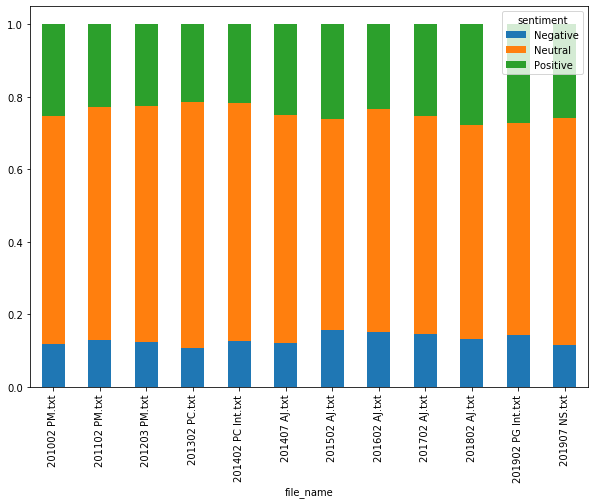

In [68]:
speech_cons.plot.bar(stacked=True,figsize=(10,7))

In [69]:
data4.Sent_clean_1[data4.file_name=='201002 PM.txt']

1799    presented interim budget february regular budget july august house indian economy facing grave uncertainties
1800                                                             growth started decelerating business sentiment weak
1801                economy capacity sustain high growth serious threat widespread economic slowdown developed world
1802                                   not clear us also policy makers many countries crisis would eventually unfold
1803                                                                     would impact growth momentum indian economy
                                                            ...                                                     
2421                                                                                                      time right
2422                                    placed faith hands people know depended upon rise occasion national interest
2423                           placed faith collective conscienc

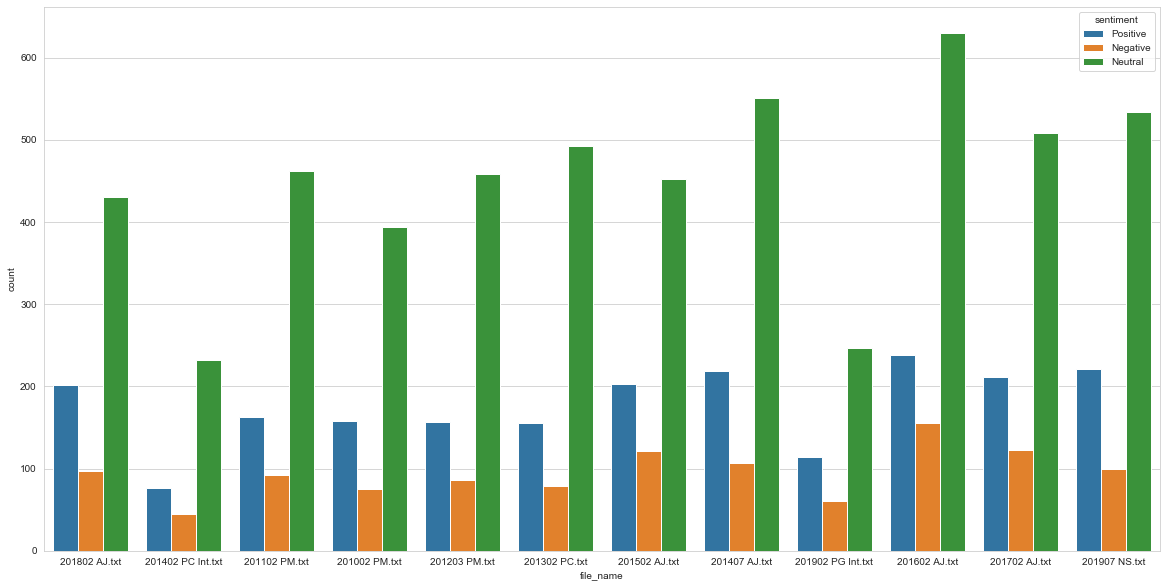

In [70]:
# Sentiments wise split of the speeches


import seaborn as sns

plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="file_name",hue="sentiment", data=data4)

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

In [72]:
# Merging the cleaned text
data4['Sent_clean_3']=data4['Sent_clean_2']

for i in range(len(data4['Sent_clean_2'])):
    data4['Sent_clean_3'][i] = ' '.join(data4['Sent_clean_2'][i])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [73]:
data4['Sent_clean_3'].tail(5)

8645    servic old age home run central govern state govern entiti regist section aa incom tax act
8646                         servic nation pension system trust member consider form administr fee
8647    rehabilit therapi counsel servic rehabilit profession recognis rehabilit council india act
8648                                              admiss circus danc theatr etc admiss ticket upto
8649                                                                                        person
Name: Sent_clean_3, dtype: object

In [74]:
# Dropping the annexure parts of the speeches

final_df=data4

final_df.drop(final_df[final_df['Segment']=='Annexure Tables'].index, inplace = True) 
final_df.drop(final_df[final_df['Segment']=='Annexure_B'].index, inplace = True) 
final_df.drop(final_df[final_df['Segment']=='Annexure-A'].index, inplace = True) 
final_df.drop(final_df[final_df['Segment']=='Annexure-B'].index, inplace = True) 

In [75]:
# Creating dictionary for mapping the sectors
sector_dict={'Agriculture, Forestry and Fishing' : ['agri','agro','farmer','rice','wheat','kissan','farmer','farmers','farm','dairy','poultry','aquaculture','fish','forest','cereals','pulses','grain','vegetables','krishi','seed','irrigation','fci','food','kharif','rabi'],
            'Mining & Quarrying' : ['coal','mine','quarry','quarrying','mining'],
            'Manufacturing' : ['manufacture','manufacturing','automobile','production','industry','industries','industrial','enterprises','sez','msme','industry','sme','textile','gold','silk','nirman','vehicles','jewellery'],
            'Electricity, Gas, Water Supply & Other Utility' : ['gas','pertrol','petroleum','crude','oil','power','electricity','hydro','energy','renewable','river','irrigation','water','drinking','riverfront'],
            'Construction' : ['mega','infrastructure','construction','highways','roas','port','roads','ports','airport','infra','shipping','housing','corridor'],
            'Trade, Hotels, Transport, Communication and Services Related to Broadcasting' : ['hotel','metro','railway','tourism','tourist','infotainment','entertainment','railway','aviation','telecom','baggage','culture','trade','trader','information','it','startups'],
            'Financial, Real Estate and Professional Services' : ['bank','nbfc','mfi','home','house','housing','rbi','insure','insurance','account','finance','financial','nabard','sebi','estate','cash','interest','market','mutual','savings','money','monetary','bond'],
            'Public Administration, Defence and Other Services' : ['defence','military','police','security','job','skill','youth','governance','education','health','environment','conservation','sports','women','hospital','medical','rank','legal','jawan','wage','uid','stamp','corruption','child','women','social','pollution','garbage','green','swatchh','senior','science','customs','niti','cinema']
            }

In [76]:
# Defining function for sector mapping
def sector_mapping(text):
    sectors=[]
    for sector in sector_dict:
        keywords=sector_dict[sector]
        flag=0
        for word in keywords:
            if word in text:
                flag=1
            else:
                continue
            if flag==1:
                sectors.append(sector)
            else:
                continue
    return sectors

In [77]:
final_df['GDP_Sect'] =''
final_df.head(2)

,file_name,Sentence,FM,year,Budget,date,Sent_clean,length_sent,Part,Segment,Sector,Sent_clean_1,Sent_clean_2,polariy,sentiment,Sent_clean_3,GDP_Sect
0,201802 AJ.txt,"Madam, four years ago, we pledged to the people of India to give \n this nation an honest, clean and transparent Government.",Arun Jaitley,2018,Budget,"February 1, 2018",Madam four years ago we pledged to the people of India to give this nation an honest clean and transparent Government,121,Part A,Introduction,,madam four years ago pledged people india give nation honest clean transparent government,"[madam, four, year, ago, pledg, peopl, india, give, nation, honest, clean, transpar, govern]",0.483333,Positive,madam four year ago pledg peopl india give nation honest clean transpar govern,
1,201802 AJ.txt,We promised a \n leadership capable of taking difficult decisions and restoring strong \n performance of Indian economy.,Arun Jaitley,2018,Budget,"February 1, 2018",We promised a leadership capable of taking difficult decisions and restoring strong performance of Indian economy,115,Part A,Introduction,,promised leadership capable taking difficult decisions restoring strong performance indian economy,"[promis, leadership, capabl, take, difficult, decis, restor, strong, perform, indian, economi]",-0.033333,Negative,promis leadership capabl take difficult decis restor strong perform indian economi,


In [78]:
#Mapping Sector in the dataframe
final_df['GDP_Sect'] = final_df['Sent_clean_1'].apply(lambda x : sector_mapping(x))

In [79]:
# Creating new dataframe with required fields
var=['file_name','FM','Budget','date','Sent_clean_1','Sent_clean_2','Sent_clean_3','polariy','sentiment','GDP_Sect']
final_df1=final_df[var]

In [80]:
# Exploding the dataset in case of multiple sector tagging
final_df1=final_df1.explode('GDP_Sect')

In [81]:
final_df1.shape

(13717, 10)

In [82]:
final_df1.groupby('GDP_Sect').count()

,file_name,FM,Budget,date,Sent_clean_1,Sent_clean_2,Sent_clean_3,polariy,sentiment
GDP_Sect,,,,,,,,,
"Agriculture, Forestry and Fishing",1302,1302,1302,1302,1302,1302,1302,1302,1302
Construction,1549,1549,1549,1549,1549,1549,1549,1549,1549
"Electricity, Gas, Water Supply & Other Utility",558,558,558,558,558,558,558,558,558
"Financial, Real Estate and Professional Services",1779,1779,1779,1779,1779,1779,1779,1779,1779
Manufacturing,803,803,803,803,803,803,803,803,803
Mining & Quarrying,123,123,123,123,123,123,123,123,123
"Public Administration, Defence and Other Services",1805,1805,1805,1805,1805,1805,1805,1805,1805
"Trade, Hotels, Transport, Communication and Services Related to Broadcasting",3584,3584,3584,3584,3584,3584,3584,3584,3584


In [83]:
final_df1.tail(5)

,file_name,FM,Budget,date,Sent_clean_1,Sent_clean_2,Sent_clean_3,polariy,sentiment,GDP_Sect
8341,201907 NS.txt,Nirmala Sitharaman,Budget,"July 5, 2019",would urge trade business avail opportunity free legacy litigations,"[would, urg, trade, busi, avail, opportun, free, legaci, litig]",would urg trade busi avail opportun free legaci litig,0.4,Positive,"Trade, Hotels, Transport, Communication and Services Related to Broadcasting"
8341,201907 NS.txt,Nirmala Sitharaman,Budget,"July 5, 2019",would urge trade business avail opportunity free legacy litigations,"[would, urg, trade, busi, avail, opportun, free, legaci, litig]",would urg trade busi avail opportun free legaci litig,0.4,Positive,"Trade, Hotels, Transport, Communication and Services Related to Broadcasting"
8342,201907 NS.txt,Nirmala Sitharaman,Budget,"July 5, 2019",details tax proposals given annexure,"[detail, tax, propos, given, annexur]",detail tax propos given annexur,0.0,Neutral,NaN
8648,201907 NS.txt,Nirmala Sitharaman,Budget,"July 5, 2019",admission circus dance theatre etc admission ticket upto,"[admiss, circus, danc, theatr, etc, admiss, ticket, upto]",admiss circus danc theatr etc admiss ticket upto,0.0,Neutral,NaN
8649,201907 NS.txt,Nirmala Sitharaman,Budget,"July 5, 2019",person,[person],person,0.0,Neutral,NaN


# Individual speech wise analysis - Pranabh Mukherjee -2010

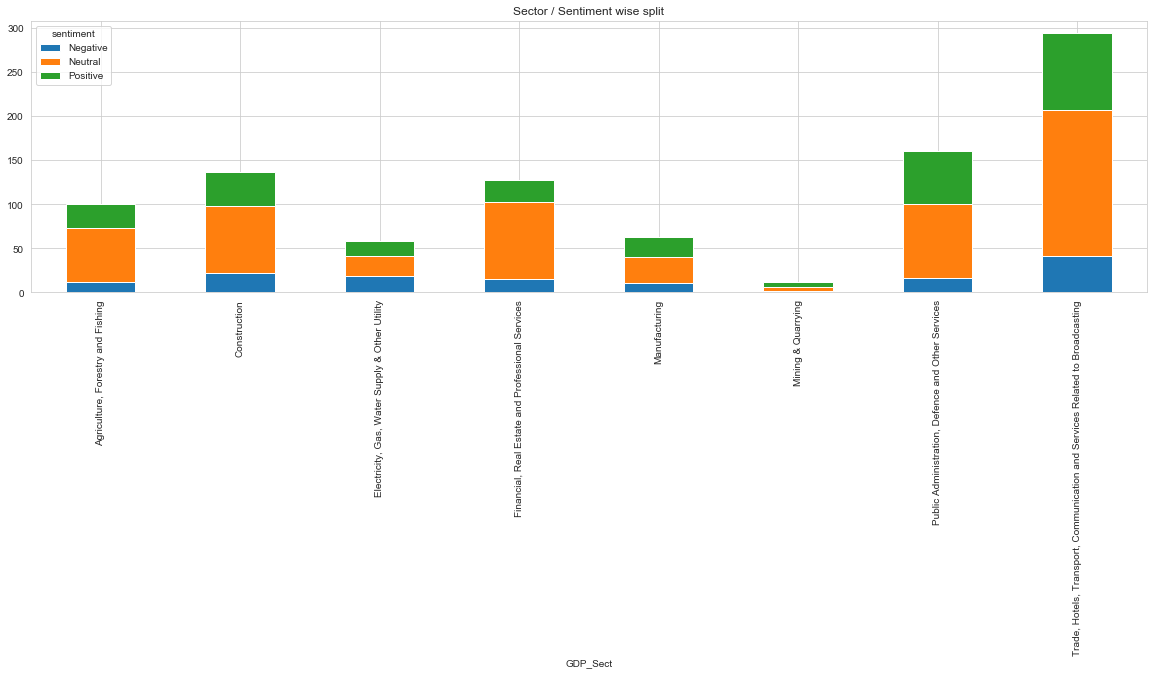

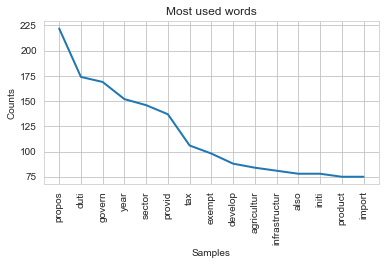

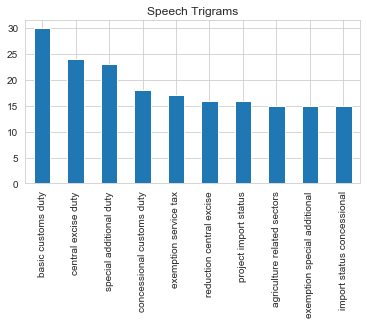

In [86]:
PM_2010 = pd.pivot_table(
    final_df1[final_df1.file_name=='201002 PM.txt'],
    index='GDP_Sect',
    columns = 'sentiment',
    values = 'FM',
    aggfunc = 'count'
)

PM_2010.plot.bar(stacked=True,figsize=(20,5),title='Sector / Sentiment wise split')

speech_combined = np.concatenate(final_df1.Sent_clean_2[final_df1.file_name=='201002 PM.txt'].values)

fdist = FreqDist(speech_combined)

plt.figure(figsize=[6,3])
fdist.plot(15,title='Most used words')
plt.show()


trigram_count_vectorizer = CountVectorizer(ngram_range=(3,3),max_features=150)

X_trigram = trigram_count_vectorizer.fit_transform(final_df1.Sent_clean_1[final_df1.file_name=='201002 PM.txt'])

DTM_trigram = pd.DataFrame(X_trigram.toarray(), columns=trigram_count_vectorizer.get_feature_names())

DTM_trigram.sum().sort_values(ascending=False).head(10).plot.bar(figsize=(6,3),title='Speech Trigrams')  

# Pranabh Mukherjee -2011

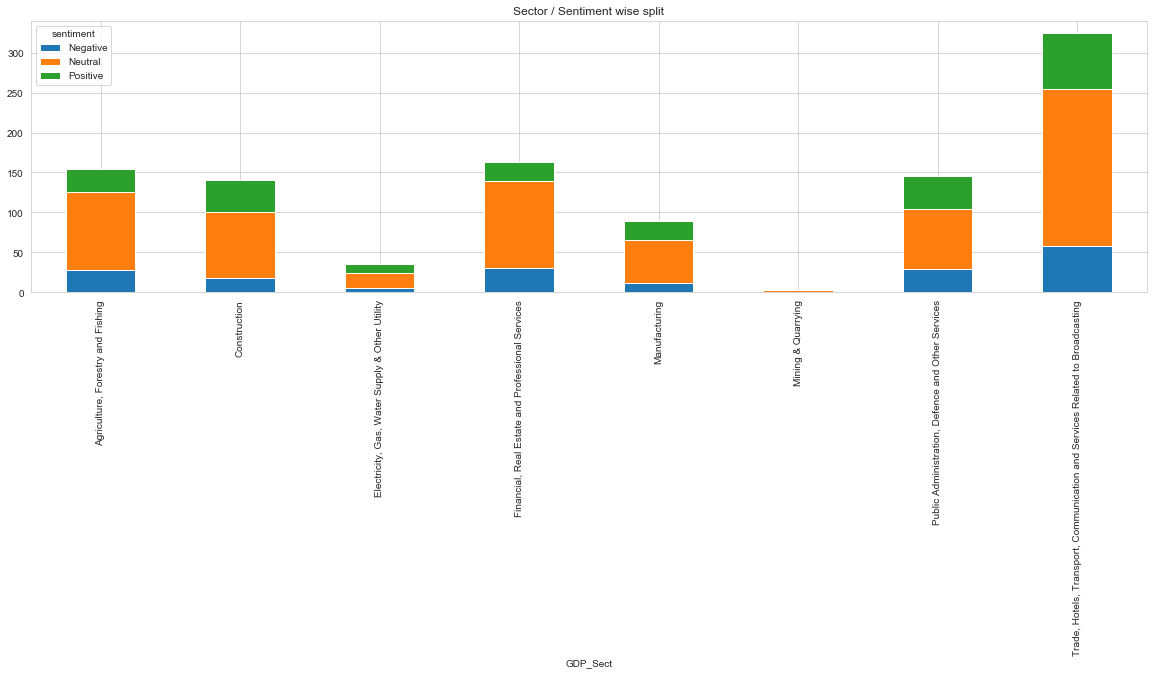

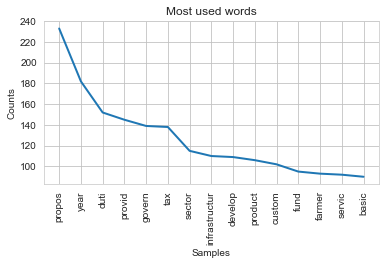

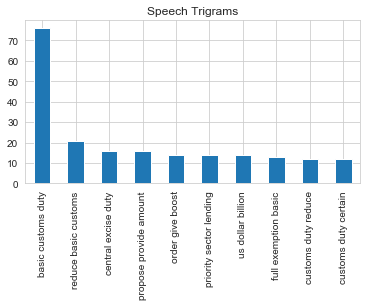

In [85]:
PM_2010 = pd.pivot_table(
    final_df1[final_df1.file_name=='201102 PM.txt'],
    index='GDP_Sect',
    columns = 'sentiment',
    values = 'FM',
    aggfunc = 'count'
)

PM_2010.plot.bar(stacked=True,figsize=(20,5),title='Sector / Sentiment wise split')

speech_combined = np.concatenate(final_df1.Sent_clean_2[final_df1.file_name=='201102 PM.txt'].values)

fdist = FreqDist(speech_combined)

plt.figure(figsize=[6,3])
fdist.plot(15,title='Most used words')
plt.show()


trigram_count_vectorizer = CountVectorizer(ngram_range=(3,3),max_features=150)

X_trigram = trigram_count_vectorizer.fit_transform(final_df1.Sent_clean_1[final_df1.file_name=='201102 PM.txt'])

DTM_trigram = pd.DataFrame(X_trigram.toarray(), columns=trigram_count_vectorizer.get_feature_names())

DTM_trigram.sum().sort_values(ascending=False).head(10).plot.bar(figsize=(6,3),title='Speech Trigrams')  

# Pranabh Mukherjee -2012

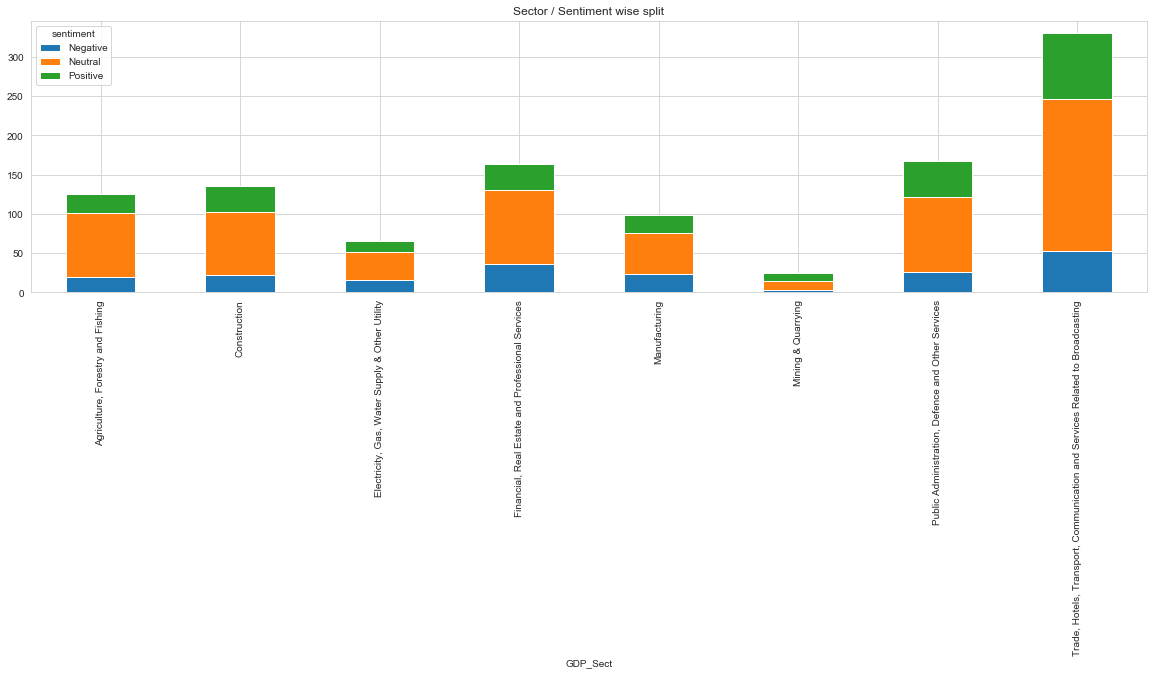

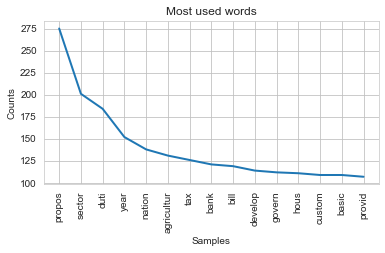

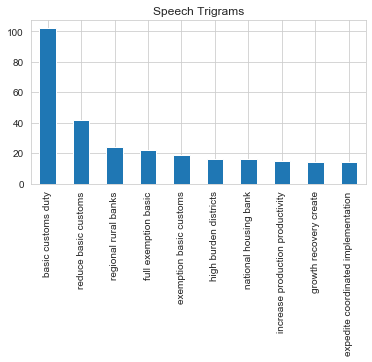

In [87]:
PM_2010 = pd.pivot_table(
    final_df1[final_df1.file_name=='201203 PM.txt'],
    index='GDP_Sect',
    columns = 'sentiment',
    values = 'FM',
    aggfunc = 'count'
)

PM_2010.plot.bar(stacked=True,figsize=(20,5),title='Sector / Sentiment wise split')

speech_combined = np.concatenate(final_df1.Sent_clean_2[final_df1.file_name=='201203 PM.txt'].values)

fdist = FreqDist(speech_combined)

plt.figure(figsize=[6,3])
fdist.plot(15,title='Most used words')
plt.show()


trigram_count_vectorizer = CountVectorizer(ngram_range=(3,3),max_features=150)

X_trigram = trigram_count_vectorizer.fit_transform(final_df1.Sent_clean_1[final_df1.file_name=='201203 PM.txt'])

DTM_trigram = pd.DataFrame(X_trigram.toarray(), columns=trigram_count_vectorizer.get_feature_names())

DTM_trigram.sum().sort_values(ascending=False).head(10).plot.bar(figsize=(6,3),title='Speech Trigrams')  

# P Chidambaram-2013

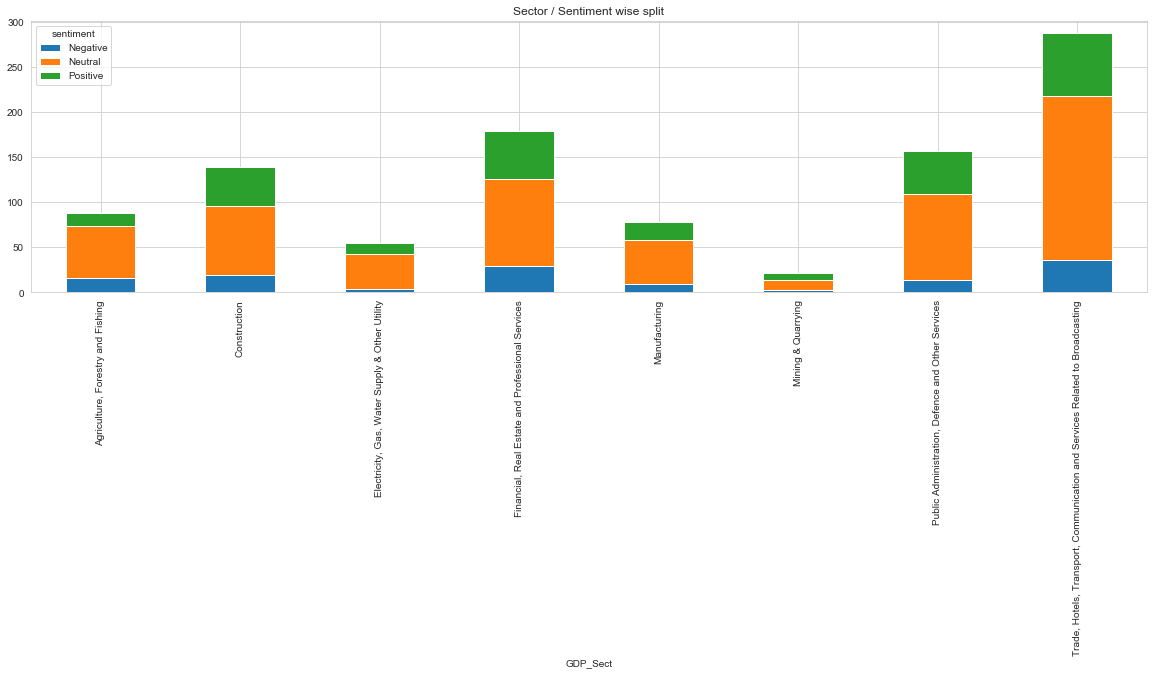

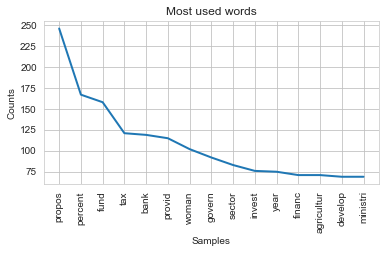

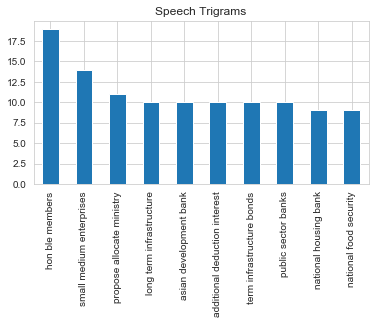

In [88]:
PM_2010 = pd.pivot_table(
    final_df1[final_df1.file_name=='201302 PC.txt'],
    index='GDP_Sect',
    columns = 'sentiment',
    values = 'FM',
    aggfunc = 'count'
)

PM_2010.plot.bar(stacked=True,figsize=(20,5),title='Sector / Sentiment wise split')

speech_combined = np.concatenate(final_df1.Sent_clean_2[final_df1.file_name=='201302 PC.txt'].values)

fdist = FreqDist(speech_combined)

plt.figure(figsize=[6,3])
fdist.plot(15,title='Most used words')
plt.show()


trigram_count_vectorizer = CountVectorizer(ngram_range=(3,3),max_features=150)

X_trigram = trigram_count_vectorizer.fit_transform(final_df1.Sent_clean_1[final_df1.file_name=='201302 PC.txt'])

DTM_trigram = pd.DataFrame(X_trigram.toarray(), columns=trigram_count_vectorizer.get_feature_names())

DTM_trigram.sum().sort_values(ascending=False).head(10).plot.bar(figsize=(6,3),title='Speech Trigrams')  

# P Chidambaram - 2014 (Int)

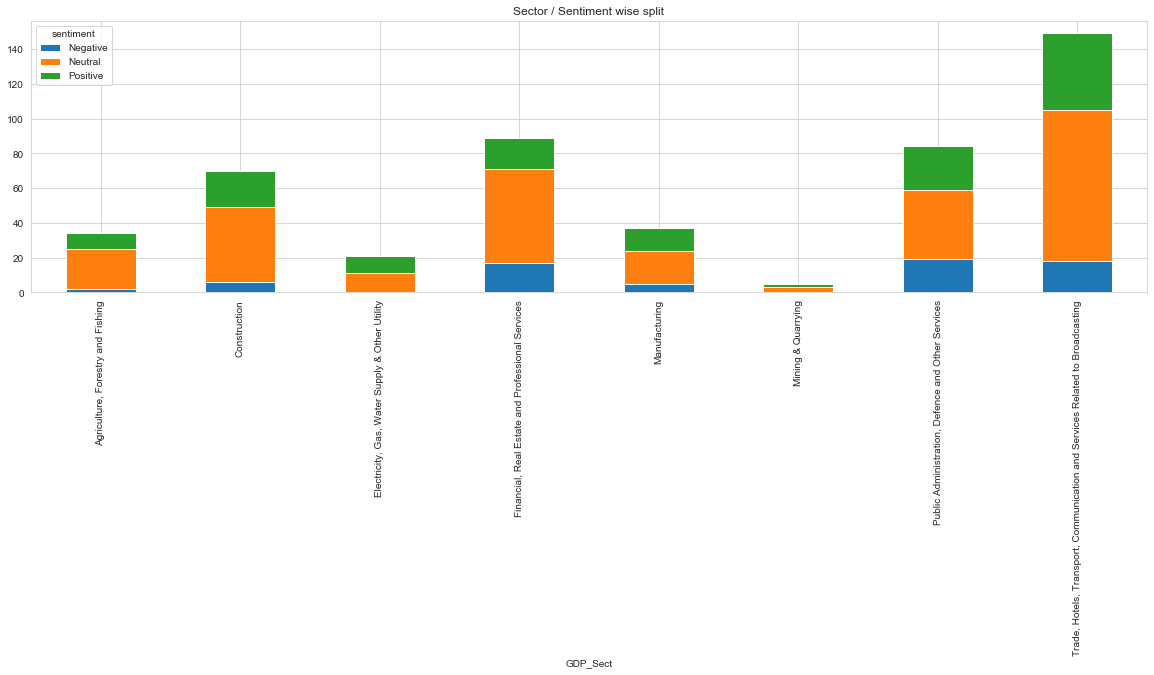

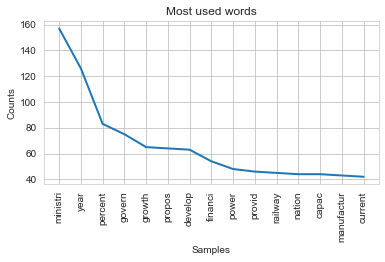

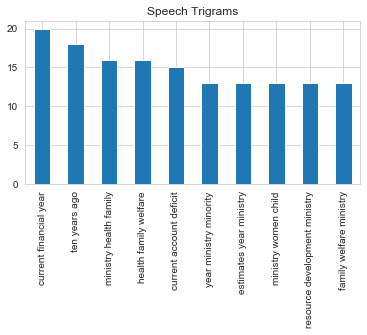

In [89]:
PM_2010 = pd.pivot_table(
    final_df1[final_df1.file_name=='201402 PC Int.txt'],
    index='GDP_Sect',
    columns = 'sentiment',
    values = 'FM',
    aggfunc = 'count'
)

PM_2010.plot.bar(stacked=True,figsize=(20,5),title='Sector / Sentiment wise split')

speech_combined = np.concatenate(final_df1.Sent_clean_2[final_df1.file_name=='201402 PC Int.txt'].values)

fdist = FreqDist(speech_combined)

plt.figure(figsize=[6,3])
fdist.plot(15,title='Most used words')
plt.show()


trigram_count_vectorizer = CountVectorizer(ngram_range=(3,3),max_features=150)

X_trigram = trigram_count_vectorizer.fit_transform(final_df1.Sent_clean_1[final_df1.file_name=='201402 PC Int.txt'])

DTM_trigram = pd.DataFrame(X_trigram.toarray(), columns=trigram_count_vectorizer.get_feature_names())

DTM_trigram.sum().sort_values(ascending=False).head(10).plot.bar(figsize=(6,3),title='Speech Trigrams') 

# Arun Jaitely-2014

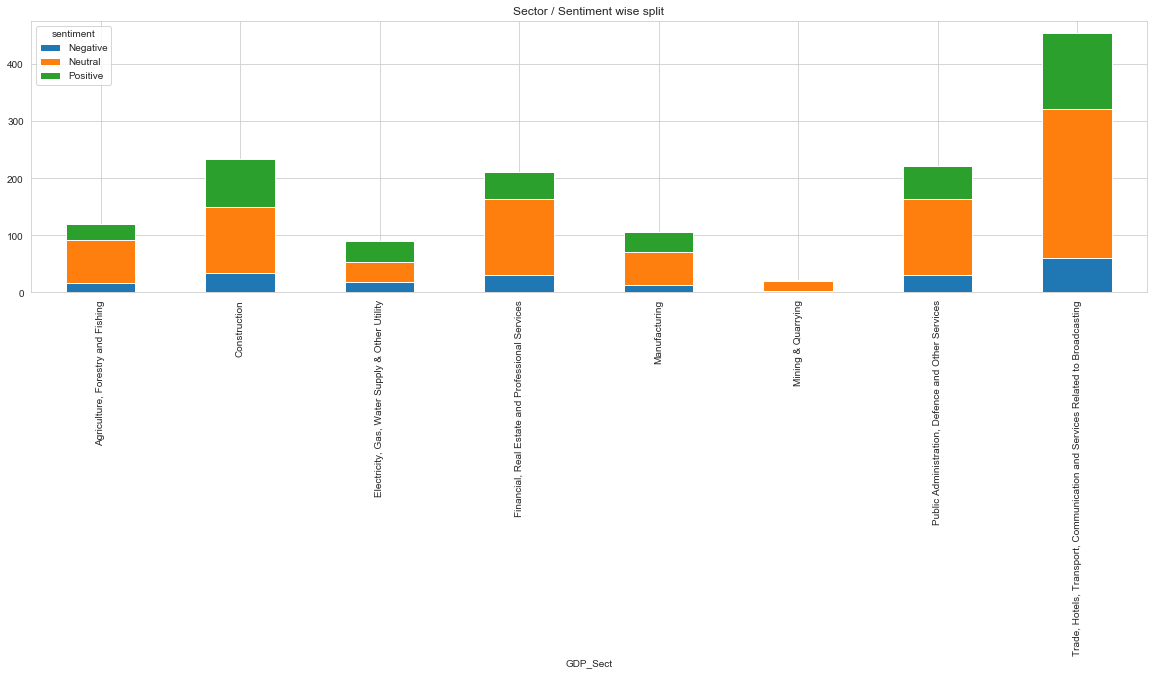

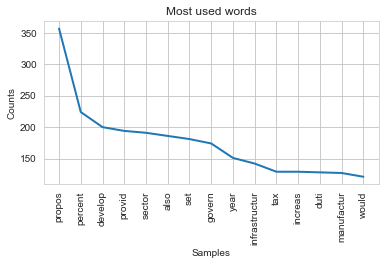

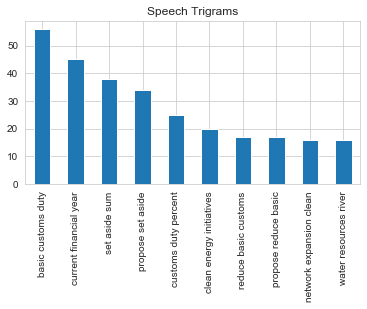

In [90]:
PM_2010 = pd.pivot_table(
    final_df1[final_df1.file_name=='201407 AJ.txt'],
    index='GDP_Sect',
    columns = 'sentiment',
    values = 'FM',
    aggfunc = 'count'
)

PM_2010.plot.bar(stacked=True,figsize=(20,5),title='Sector / Sentiment wise split')

speech_combined = np.concatenate(final_df1.Sent_clean_2[final_df1.file_name=='201407 AJ.txt'].values)

fdist = FreqDist(speech_combined)

plt.figure(figsize=[6,3])
fdist.plot(15,title='Most used words')
plt.show()


trigram_count_vectorizer = CountVectorizer(ngram_range=(3,3),max_features=150)

X_trigram = trigram_count_vectorizer.fit_transform(final_df1.Sent_clean_1[final_df1.file_name=='201407 AJ.txt'])

DTM_trigram = pd.DataFrame(X_trigram.toarray(), columns=trigram_count_vectorizer.get_feature_names())

DTM_trigram.sum().sort_values(ascending=False).head(10).plot.bar(figsize=(6,3),title='Speech Trigrams') 

# Arun Jaitely-2015

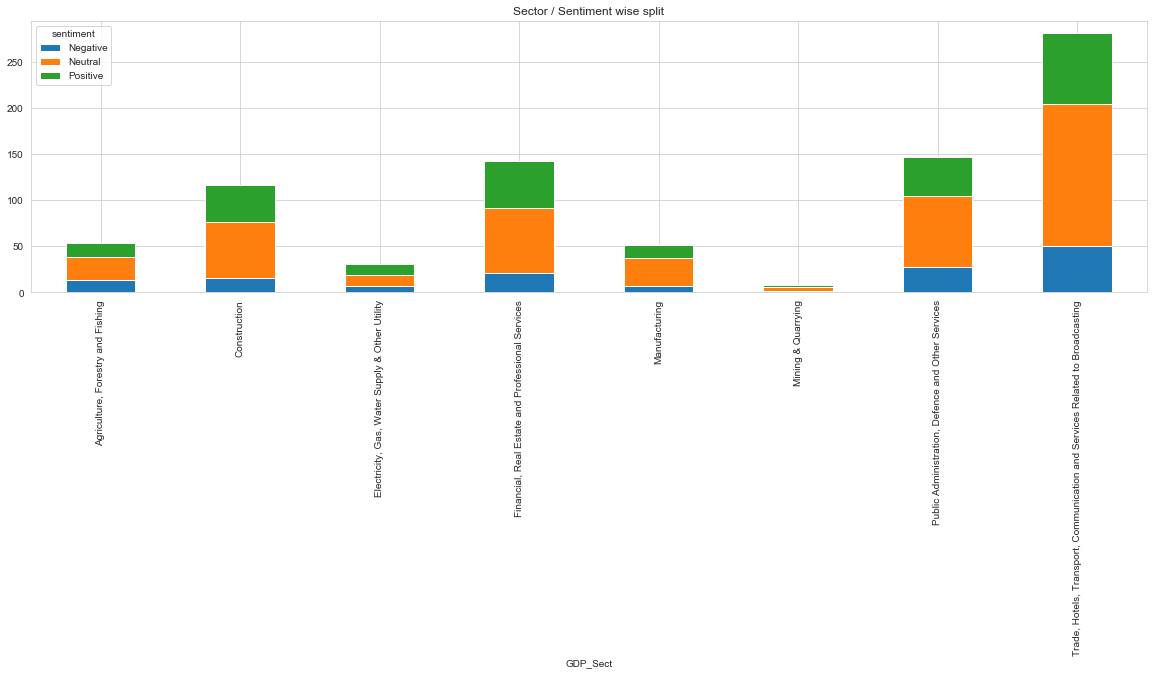

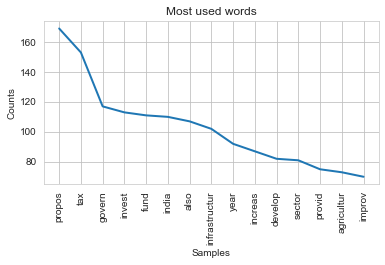

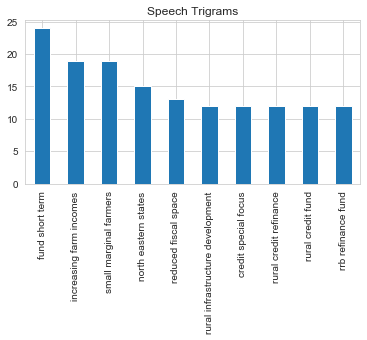

In [91]:
PM_2010 = pd.pivot_table(
    final_df1[final_df1.file_name=='201502 AJ.txt'],
    index='GDP_Sect',
    columns = 'sentiment',
    values = 'FM',
    aggfunc = 'count'
)

PM_2010.plot.bar(stacked=True,figsize=(20,5),title='Sector / Sentiment wise split')

speech_combined = np.concatenate(final_df1.Sent_clean_2[final_df1.file_name=='201502 AJ.txt'].values)

fdist = FreqDist(speech_combined)

plt.figure(figsize=[6,3])
fdist.plot(15,title='Most used words')
plt.show()


trigram_count_vectorizer = CountVectorizer(ngram_range=(3,3),max_features=150)

X_trigram = trigram_count_vectorizer.fit_transform(final_df1.Sent_clean_1[final_df1.file_name=='201502 AJ.txt'])

DTM_trigram = pd.DataFrame(X_trigram.toarray(), columns=trigram_count_vectorizer.get_feature_names())

DTM_trigram.sum().sort_values(ascending=False).head(10).plot.bar(figsize=(6,3),title='Speech Trigrams') 

# Arun Jaitely-2016

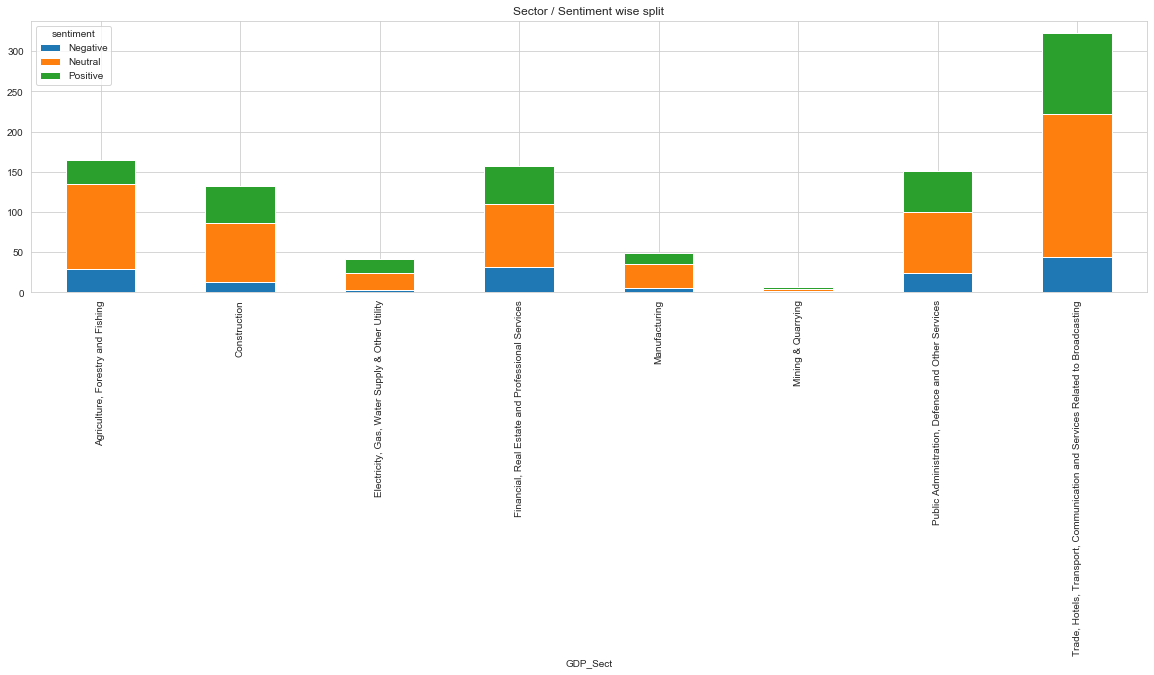

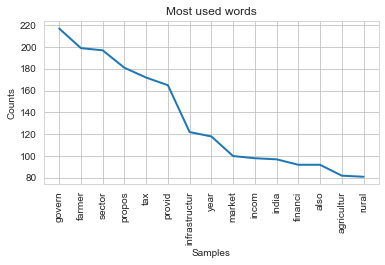

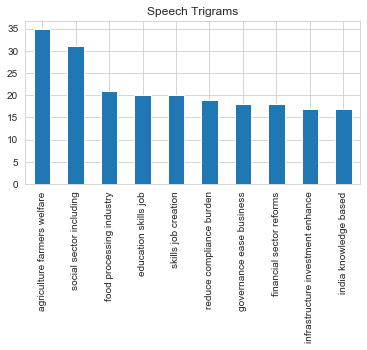

In [92]:
PM_2010 = pd.pivot_table(
    final_df1[final_df1.file_name=='201602 AJ.txt'],
    index='GDP_Sect',
    columns = 'sentiment',
    values = 'FM',
    aggfunc = 'count'
)

PM_2010.plot.bar(stacked=True,figsize=(20,5),title='Sector / Sentiment wise split')

speech_combined = np.concatenate(final_df1.Sent_clean_2[final_df1.file_name=='201602 AJ.txt'].values)

fdist = FreqDist(speech_combined)

plt.figure(figsize=[6,3])
fdist.plot(15,title='Most used words')
plt.show()


trigram_count_vectorizer = CountVectorizer(ngram_range=(3,3),max_features=150)

X_trigram = trigram_count_vectorizer.fit_transform(final_df1.Sent_clean_1[final_df1.file_name=='201602 AJ.txt'])

DTM_trigram = pd.DataFrame(X_trigram.toarray(), columns=trigram_count_vectorizer.get_feature_names())

DTM_trigram.sum().sort_values(ascending=False).head(10).plot.bar(figsize=(6,3),title='Speech Trigrams') 

# Arun Jaitely-2017

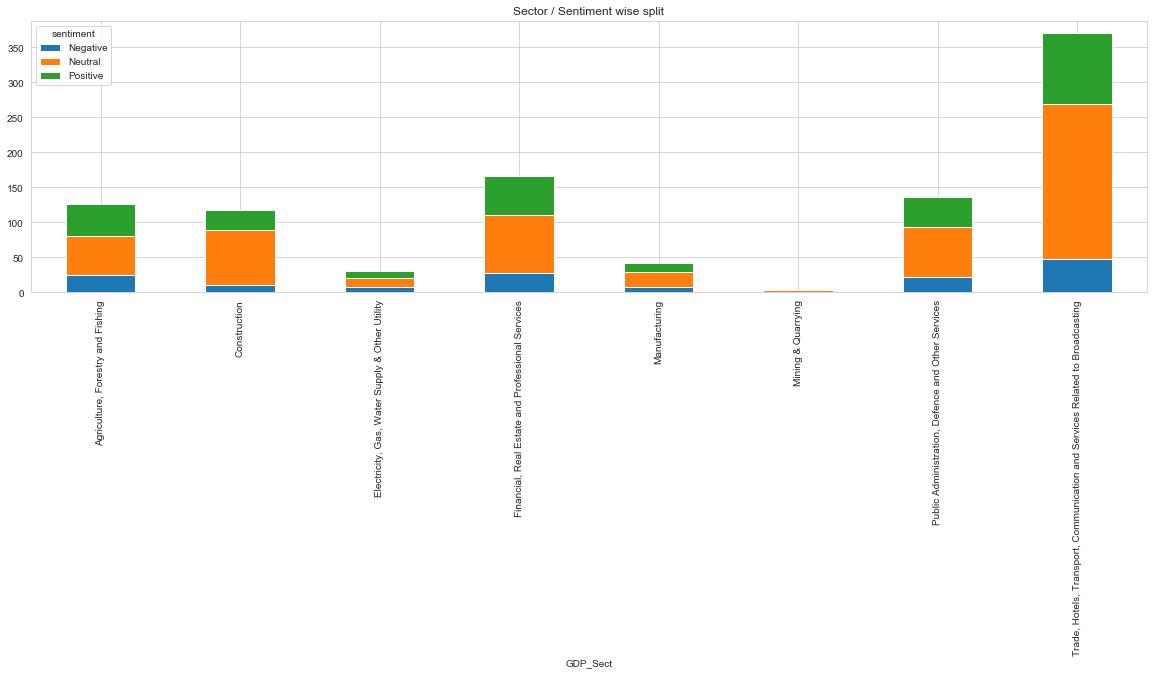

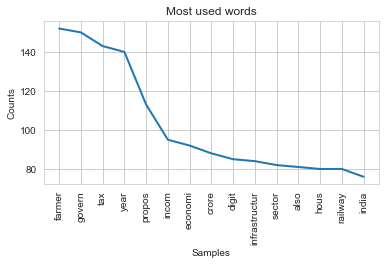

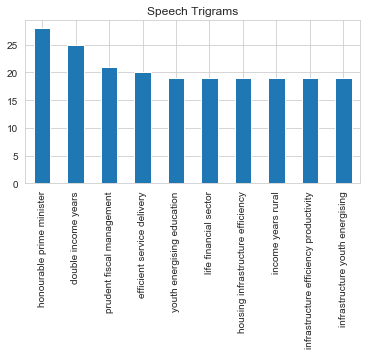

In [93]:
PM_2010 = pd.pivot_table(
    final_df1[final_df1.file_name=='201702 AJ.txt'],
    index='GDP_Sect',
    columns = 'sentiment',
    values = 'FM',
    aggfunc = 'count'
)

PM_2010.plot.bar(stacked=True,figsize=(20,5),title='Sector / Sentiment wise split')

speech_combined = np.concatenate(final_df1.Sent_clean_2[final_df1.file_name=='201702 AJ.txt'].values)

fdist = FreqDist(speech_combined)

plt.figure(figsize=[6,3])
fdist.plot(15,title='Most used words')
plt.show()


trigram_count_vectorizer = CountVectorizer(ngram_range=(3,3),max_features=150)

X_trigram = trigram_count_vectorizer.fit_transform(final_df1.Sent_clean_1[final_df1.file_name=='201702 AJ.txt'])

DTM_trigram = pd.DataFrame(X_trigram.toarray(), columns=trigram_count_vectorizer.get_feature_names())

DTM_trigram.sum().sort_values(ascending=False).head(10).plot.bar(figsize=(6,3),title='Speech Trigrams') 

# Arun Jaitely-2018

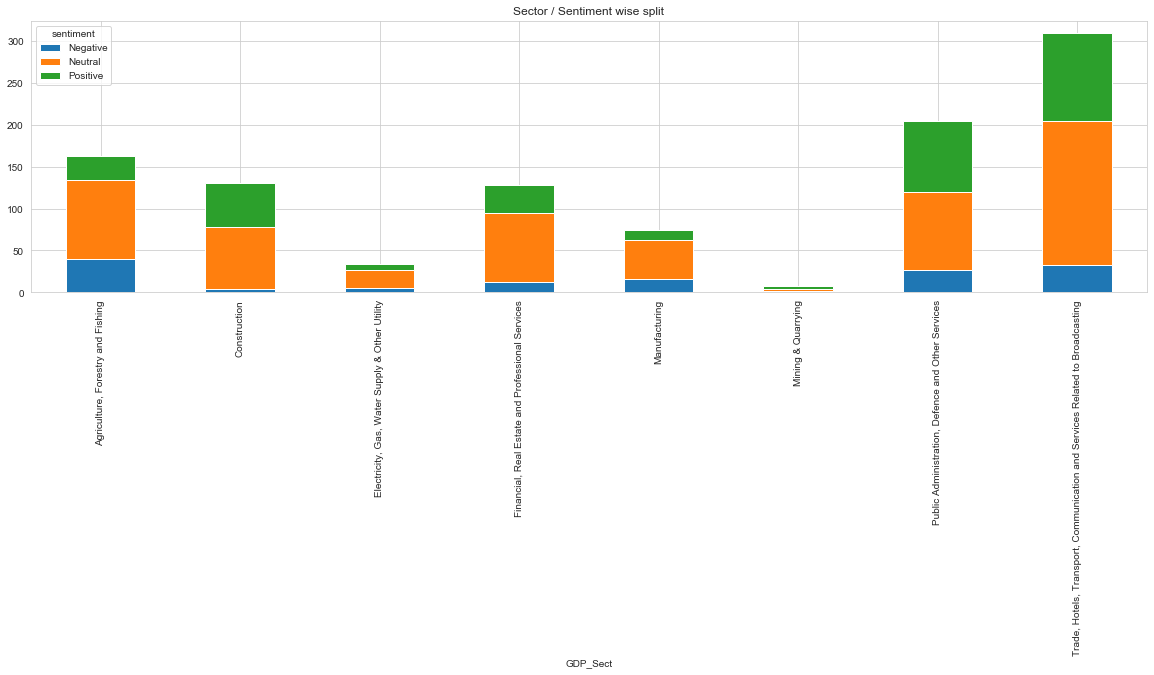

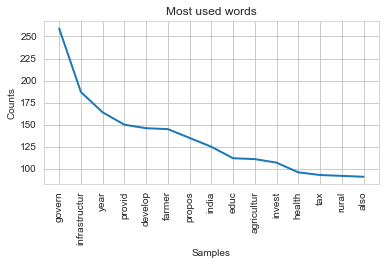

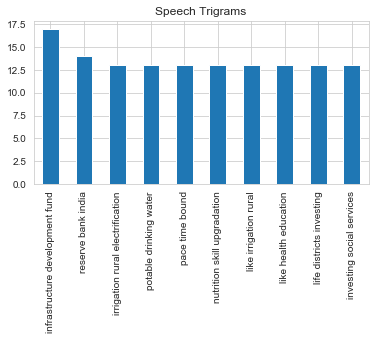

In [94]:
PM_2010 = pd.pivot_table(
    final_df1[final_df1.file_name=='201802 AJ.txt'],
    index='GDP_Sect',
    columns = 'sentiment',
    values = 'FM',
    aggfunc = 'count'
)

PM_2010.plot.bar(stacked=True,figsize=(20,5),title='Sector / Sentiment wise split')

speech_combined = np.concatenate(final_df1.Sent_clean_2[final_df1.file_name=='201802 AJ.txt'].values)

fdist = FreqDist(speech_combined)

plt.figure(figsize=[6,3])
fdist.plot(15,title='Most used words')
plt.show()


trigram_count_vectorizer = CountVectorizer(ngram_range=(3,3),max_features=150)

X_trigram = trigram_count_vectorizer.fit_transform(final_df1.Sent_clean_1[final_df1.file_name=='201802 AJ.txt'])

DTM_trigram = pd.DataFrame(X_trigram.toarray(), columns=trigram_count_vectorizer.get_feature_names())

DTM_trigram.sum().sort_values(ascending=False).head(10).plot.bar(figsize=(6,3),title='Speech Trigrams') 

# Piyush Goyal-2019 (Int)

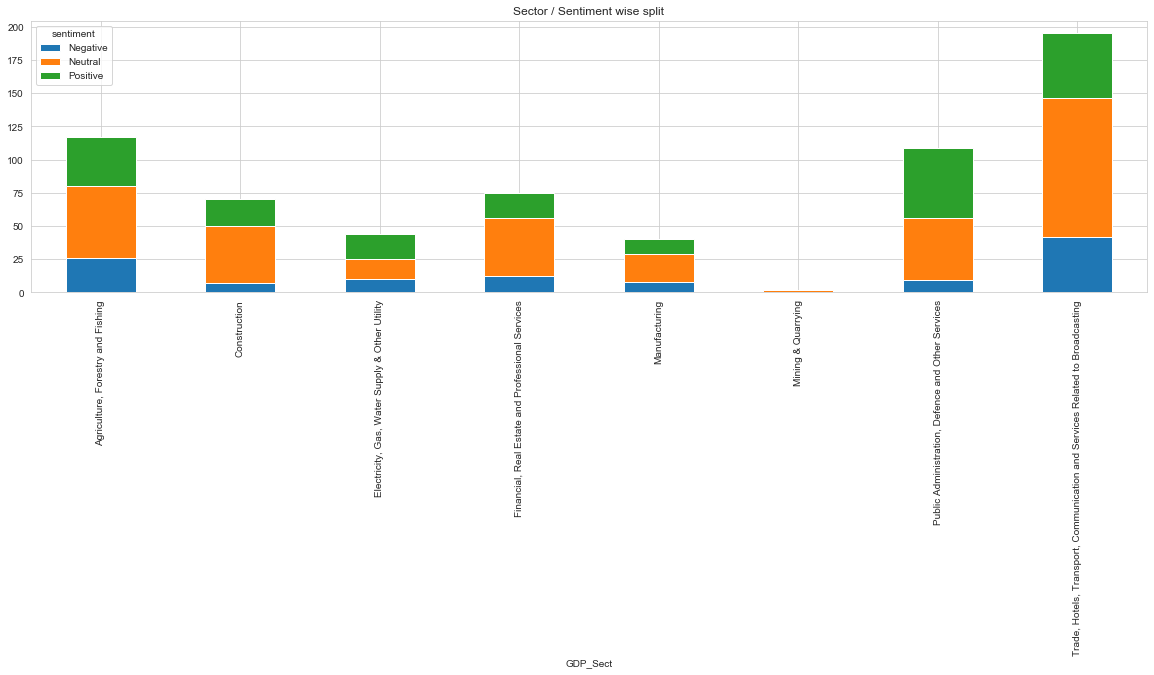

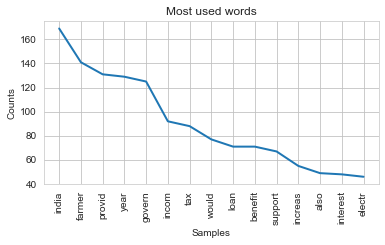

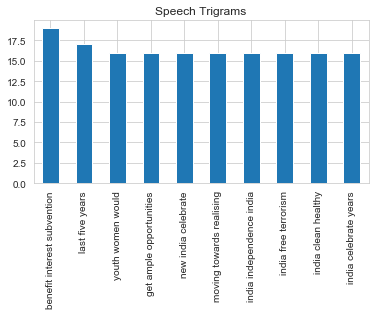

In [95]:
PM_2010 = pd.pivot_table(
    final_df1[final_df1.file_name=='201902 PG Int.txt'],
    index='GDP_Sect',
    columns = 'sentiment',
    values = 'FM',
    aggfunc = 'count'
)

PM_2010.plot.bar(stacked=True,figsize=(20,5),title='Sector / Sentiment wise split')

speech_combined = np.concatenate(final_df1.Sent_clean_2[final_df1.file_name=='201902 PG Int.txt'].values)

fdist = FreqDist(speech_combined)

plt.figure(figsize=[6,3])
fdist.plot(15,title='Most used words')
plt.show()


trigram_count_vectorizer = CountVectorizer(ngram_range=(3,3),max_features=150)

X_trigram = trigram_count_vectorizer.fit_transform(final_df1.Sent_clean_1[final_df1.file_name=='201902 PG Int.txt'])

DTM_trigram = pd.DataFrame(X_trigram.toarray(), columns=trigram_count_vectorizer.get_feature_names())

DTM_trigram.sum().sort_values(ascending=False).head(10).plot.bar(figsize=(6,3),title='Speech Trigrams') 

# Nirmala Sitharaman-2019

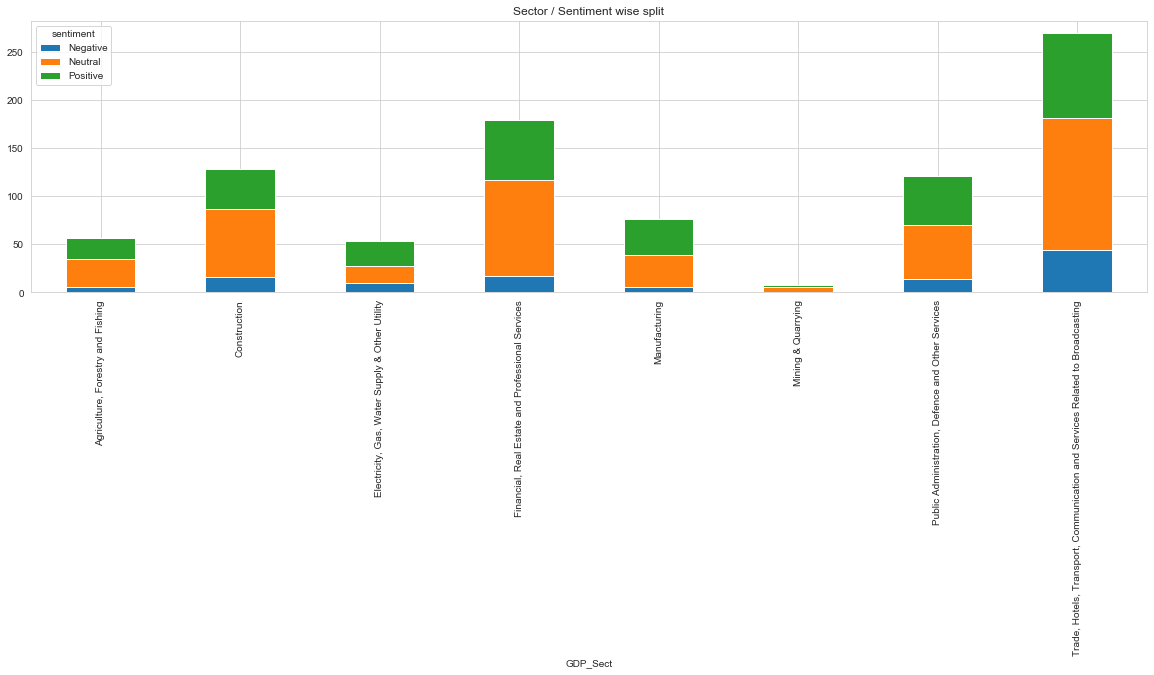

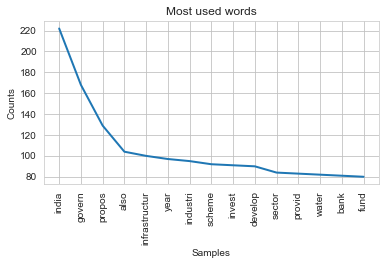

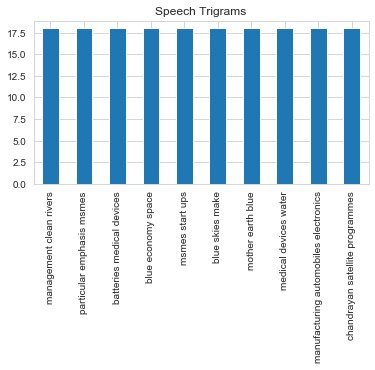

In [96]:
PM_2010 = pd.pivot_table(
    final_df1[final_df1.file_name=='201907 NS.txt'],
    index='GDP_Sect',
    columns = 'sentiment',
    values = 'FM',
    aggfunc = 'count'
)

PM_2010.plot.bar(stacked=True,figsize=(20,5),title='Sector / Sentiment wise split')

speech_combined = np.concatenate(final_df1.Sent_clean_2[final_df1.file_name=='201907 NS.txt'].values)

fdist = FreqDist(speech_combined)

plt.figure(figsize=[6,3])
fdist.plot(15,title='Most used words')
plt.show()


trigram_count_vectorizer = CountVectorizer(ngram_range=(3,3),max_features=150)

X_trigram = trigram_count_vectorizer.fit_transform(final_df1.Sent_clean_1[final_df1.file_name=='201907 NS.txt'])

DTM_trigram = pd.DataFrame(X_trigram.toarray(), columns=trigram_count_vectorizer.get_feature_names())

DTM_trigram.sum().sort_values(ascending=False).head(10).plot.bar(figsize=(6,3),title='Speech Trigrams') 

# Model Building

In [97]:
final_df1.head(2)

,file_name,FM,Budget,date,Sent_clean_1,Sent_clean_2,Sent_clean_3,polariy,sentiment,GDP_Sect
0,201802 AJ.txt,Arun Jaitley,Budget,"February 1, 2018",madam four years ago pledged people india give nation honest clean transparent government,"[madam, four, year, ago, pledg, peopl, india, give, nation, honest, clean, transpar, govern]",madam four year ago pledg peopl india give nation honest clean transpar govern,0.483333,Positive,NaN
1,201802 AJ.txt,Arun Jaitley,Budget,"February 1, 2018",promised leadership capable taking difficult decisions restoring strong performance indian economy,"[promis, leadership, capabl, take, difficult, decis, restor, strong, perform, indian, economi]",promis leadership capabl take difficult decis restor strong perform indian economi,-0.033333,Negative,NaN


In [98]:
# Creating dataset for model building
mod=['Sent_clean_3','sentiment']
model1=data4[mod]

In [99]:
model1.head()

,Sent_clean_3,sentiment
0,madam four year ago pledg peopl india give nation honest clean transpar govern,Positive
1,promis leadership capabl take difficult decis restor strong perform indian economi,Negative
2,promis reduc poverti expedit infrastructur creation build strong confid new india,Positive
3,govern took india consid part fragil nation suffer polici paralysi corrupt,Negative
4,decis revers,Neutral


In [100]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier


In [101]:
model1.head(2)

,Sent_clean_3,sentiment
0,madam four year ago pledg peopl india give nation honest clean transpar govern,Positive
1,promis leadership capabl take difficult decis restor strong perform indian economi,Negative


In [102]:
# Defining dependant and independant variables
x = model1.Sent_clean_3
y = model1.sentiment

In [ ]:
x

In [103]:
# splitiing the datasetinto train & test
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=0,test_size=0.3)

In [104]:
# Models used for predicting sentiments

# Logistic
log_reg = Pipeline([('tfidf', TfidfVectorizer()),
                     ('review', LogisticRegression()),
])

# Naïve Bayes:
nev_bey = Pipeline([('tfidf', TfidfVectorizer()),
                     ('review', MultinomialNB()),
])

# Linear SVC:
sup_vect = Pipeline([('tfidf', TfidfVectorizer()),
                     ('review', LinearSVC()),
])

# Random Forest:
rand_for = Pipeline([('tfidf', TfidfVectorizer()),
                     ('review', RandomForestClassifier(random_state = 32)),
])

In [105]:
# Defining function to run the model and  give appropriate model statistics
def model(obj,name):
    ypred = obj.fit(xtrain,ytrain).predict(xtest)
    return print(name,"\n\n",
                "Accuracy Score:- ",accuracy_score(ytest,ypred),"\n\n Confusion Matrix:- \n",confusion_matrix(ytest,ypred),
                "\n\n Classification Report:- \n",classification_report(ytest,ypred))

In [106]:
model(log_reg,"Logistic Regression")

Logistic Regression 

 Accuracy Score:-  0.7838565022421524 

 Confusion Matrix:- 
 [[  82  181   21]
 [   3 1363    3]
 [   6  268  303]] 

 Classification Report:- 
               precision    recall  f1-score   support

    Negative       0.90      0.29      0.44       284
     Neutral       0.75      1.00      0.86      1369
    Positive       0.93      0.53      0.67       577

    accuracy                           0.78      2230
   macro avg       0.86      0.60      0.65      2230
weighted avg       0.82      0.78      0.76      2230



/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [107]:
model(nev_bey,"Naïve Bayes:")

Naïve Bayes: 

 Accuracy Score:-  0.6829596412556054 

 Confusion Matrix:- 
 [[  20  252   12]
 [   1 1363    5]
 [   0  437  140]] 

 Classification Report:- 
               precision    recall  f1-score   support

    Negative       0.95      0.07      0.13       284
     Neutral       0.66      1.00      0.80      1369
    Positive       0.89      0.24      0.38       577

    accuracy                           0.68      2230
   macro avg       0.84      0.44      0.44      2230
weighted avg       0.76      0.68      0.60      2230



In [108]:
model(sup_vect,"Support Vector")

Support Vector 

 Accuracy Score:-  0.9174887892376682 

 Confusion Matrix:- 
 [[ 205   57   22]
 [   4 1363    2]
 [  19   80  478]] 

 Classification Report:- 
               precision    recall  f1-score   support

    Negative       0.90      0.72      0.80       284
     Neutral       0.91      1.00      0.95      1369
    Positive       0.95      0.83      0.89       577

    accuracy                           0.92      2230
   macro avg       0.92      0.85      0.88      2230
weighted avg       0.92      0.92      0.91      2230



In [109]:
model(rand_for,"Random Forest")

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest 

 Accuracy Score:-  0.9251121076233184 

 Confusion Matrix:- 
 [[ 220   36   28]
 [   9 1357    3]
 [  26   65  486]] 

 Classification Report:- 
               precision    recall  f1-score   support

    Negative       0.86      0.77      0.82       284
     Neutral       0.93      0.99      0.96      1369
    Positive       0.94      0.84      0.89       577

    accuracy                           0.93      2230
   macro avg       0.91      0.87      0.89      2230
weighted avg       0.92      0.93      0.92      2230

